<a href="https://colab.research.google.com/github/roshanrane24/QXI_DataScience_Roshan/blob/master/ProjectCrosssell/Crosssell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train

## Importing Modules & Data

In [1]:
# To Mount Google Drive When Using Colab
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, scale
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from IPython.display import clear_output
import pickle
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
# Reading Training Data
dataTrain = pd.read_csv('drive/My Drive/train.csv')
# dataTrain = pd.read_csv('train.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,11,12,13,14,15,16,17,18,19,21,23,26,28,29,30,32,82,83,85,91,269,325,326,327,328) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## EDA & Data Cleaning

In [4]:
pd.set_option('display.max_columns',None)
dataTrain.head()

,CUSTOMER_ID,ACT_TYPE,GENDER,LEGAL_ENTITY,OCCUP_ALL_NEW,AGE,N_CASA_MAX_BALANCE_MTD,N_CASA_MIN_BALANCE_MTD,BL_TAG,TWL_TAG,PL_TAG,AL_CNC_TAG,AGRI_TAG,CE_TAG,CV_TAG,EDU_TAG,TL_TAG,OTHER_LOANS_TAG,LAP_TAG,LAS_TAG,EEG_TAG,BBG_TAG,HL_TAG,GL_TAG,AL_CLOSED,PL_CLOSED,BL_CLOSED,TWL_CLOSED,CV_CLOSED,LAP_CLOSED,LAS_CLOSED,EEG_CLOSED,BBG_CLOSED,GL_CLOSED,CC_HOLD_MON_03,CC_HOLD_MON_02,CC_HOLD_MON_01,CC_ACTIVE_MON_03,CC_ACTIVE_MON_02,CC_ACTIVE_MON_01,CC_HOLD,CC_ACTIVE,DC_HOLD,DC_ACTIVE_MON_03,DC_ACTIVE_MON_02,DC_ACTIVE_MON_01,DC_ACTIVE,DC_SPEND_MON_03,DC_SPEND_MON_02,DC_SPEND_MON_01,CC_SPEND_MON_04,CC_SPEND_MON_01,CC_SPEND_MON_02,CC_SPEND_MON_03,DC_SPEND_MON_04,PM_FD_MON_01,PM_FD_MON_02,PM_FD_MON_04,CR_LIMIT,STMT_MON_03,STMT_MON_02,STMT_MON_01,COC_ELIGIBLE,LAP_SCRUB_LIVE,LAS_SCRUB_LIVE,PL_SCRUB_LIVE,GL_SCRUB_LIVE,TWL_SCRUB_LIVE,BL_SCRUB_LIVE,CEL_SCRUB_LIVE,TL_SCRUB_LIVE,AL_SCRUB_LIVE,LAP_SCRUB_CLOSED,LAS_SCRUB_CLOSED,PL_SCRUB_CLOSED,GL_SCRUB_CLOSED,TWL_SCRUB_CLOSED,BL_SCRUB_CLOSED,CEL_SCRUB_CLOSED,TL_SCRUB_CLOSED,AL_SCRUB_CLOSED,MATURITY_GL,MATURITY_LAP,MATURITY_LAS,STMT_CON_DAE_ACTIVE_MON_01,BTE_ACTIVE_MON_01,COC_ACTIVE_MON_01,PL2CC_ACTIVE_MON_01,MER_EMI_ACTIVE_MON_01,TRN_CON_DAE_ACTIVE_MON_01,STMT_CON_DAE_CLOSED_MON_01,BTE_CLOSED_MON_01,COC_CLOSED_MON_01,PL2CC_CLOSED_MON_01,MER_EMI_CLOSED_MON_01,TRN_CON_DAE_CLOSED_MON_01,EOP_BAL_MON_01,AMB_MON_04,AMB_MON_01,AMB_MON_02,AMB_MON_03,NB_MON_01_CNT,NB_MON_02_CNT,NB_MON_03_CNT,CDMAT_MON_01,CDMAT_MON_04,MF_MON_04,MF_MON_01,RD_MON_04,RD_MON_01,FD_MON_04,FD_MON_01,LI_MON_04,LI_MON_01,GI_MON_04,GI_MON_01,CC_TXN_MON_01,CC_SPEND_MON_06,CC_TXN_MON_06,CC_TXN_MON_03,CC_TXN_MON_02,CC_TXN_MON_04,CC_SPEND_MON_05,CC_TXN_MON_05,DC_TXN_MON_04,DC_TXN_MON_01,DC_SPEND_MON_06,DC_TXN_MON_06,DC_SPEND_MON_05,DC_TXN_MON_05,DC_TXN_MON_03,DC_TXN_MON_02,DC_SPEND_MON_04_ENT,DC_SPEND_MON_04_MED,DC_SPEND_MON_04_GRC,DC_SPEND_MON_04_HMD,DC_SPEND_MON_04_HBY,DC_SPEND_MON_04_CARE,DC_SPEND_MON_04_TRL,DC_SPEND_MON_04_RST,DC_SPEND_MON_04_JER,DC_SPEND_MON_04_HTL,DC_SPEND_MON_04_ATM,DC_SPEND_MON_03_ENT,DC_SPEND_MON_03_MED,DC_SPEND_MON_03_HMD,DC_SPEND_MON_03_HBY,DC_SPEND_MON_03_CARE,DC_SPEND_MON_03_TRL,DC_SPEND_MON_03_RST,DC_SPEND_MON_03_JER,DC_SPEND_MON_03_HTL,DC_SPEND_MON_03_ATM,DC_SPEND_MON_02_ENT,DC_SPEND_MON_02_MED,DC_SPEND_MON_02_HMD,DC_SPEND_MON_02_HBY,DC_SPEND_MON_02_CARE,DC_SPEND_MON_02_TRL,DC_SPEND_MON_02_RST,DC_SPEND_MON_02_JER,DC_SPEND_MON_02_HTL,DC_SPEND_MON_02_ATM,DC_SPEND_MON_01_ENT,DC_SPEND_MON_01_MED,DC_SPEND_MON_01_HMD,DC_SPEND_MON_01_HBY,DC_SPEND_MON_01_CARE,DC_SPEND_MON_01_TRL,DC_SPEND_MON_01_RST,DC_SPEND_MON_01_JER,DC_SPEND_MON_01_HTL,DC_SPEND_MON_01_ATM,DC_SPEND_MON_05_ENT,DC_SPEND_MON_05_MED,DC_SPEND_MON_05_HMD,DC_SPEND_MON_05_HBY,DC_SPEND_MON_05_CARE,DC_SPEND_MON_05_TRL,DC_SPEND_MON_05_RST,DC_SPEND_MON_05_JER,DC_SPEND_MON_05_HTL,DC_SPEND_MON_05_ATM,CC_SPEND_MON_04_ENT,CC_SPEND_MON_04_MED,CC_SPEND_MON_04_HMD,CC_SPEND_MON_04_HBY,CC_SPEND_MON_04_CARE,CC_SPEND_MON_04_TRL,CC_SPEND_MON_04_RST,CC_SPEND_MON_04_JER,CC_SPEND_MON_04_HTL,CC_SPEND_MON_04_ATM,CC_SPEND_MON_02_ENT,CC_SPEND_MON_02_MED,CC_SPEND_MON_02_HMD,CC_SPEND_MON_02_HBY,CC_SPEND_MON_02_CARE,CC_SPEND_MON_02_TRL,CC_SPEND_MON_02_RST,CC_SPEND_MON_02_JER,CC_SPEND_MON_02_HTL,CC_SPEND_MON_02_ATM,CC_SPEND_MON_01_ENT,CC_SPEND_MON_01_MED,CC_SPEND_MON_01_HMD,CC_SPEND_MON_01_HBY,CC_SPEND_MON_01_CARE,CC_SPEND_MON_01_TRL,CC_SPEND_MON_01_RST,CC_SPEND_MON_01_JER,CC_SPEND_MON_01_HTL,CC_SPEND_MON_01_ATM,FINANCE_MON_01,JOBS_MON_01,LIFESTYLE_MON_01,INMON_01KET_MON_01,TRAVEL_MON_01,CHANNEL_CLICK_DISP,DESIGNATION_FINAL,TOP14_CITY,TOP9_CITY,PL2CC_ELIGIBLE,D_AMT_L3_MON_06,C_AMT_L3_MON_06,C_COUNT_L3_MON_06,D_COUNT_L3_MON_06,MAX_C_AMT_L3_MON_06,D_AMT_L3_MON_05,C_AMT_L3_MON_05,C_COUNT_L3_MON_05,D_COUNT_L3_MON_05,MAX_C_AMT_L3_MON_05,D_AMT_L3_MON_04,C_AMT_L3_MON_04,C_COUNT_L3_MON_04,D_COUNT_L3_MON_04,MAX_C_AMT_L3_MON_04,D_AMT_L3_MON_03,C_AMT_L3_MON_03,C_COUNT_L3_MON_03,D_COUNT_L3_MON_03,MAX_C_AMT_L3_MON_03,D_AMT_L3_MON_02,C_AMT_L3_MON_02,C_COUNT_L3_MON_02,D_COUNT_L3_MON_02,MAX_C_AMT_L3_

In [5]:
dataTrain.info(verbose=True,max_cols=333)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 333 columns):
CUSTOMER_ID                   300000 non-null int64
ACT_TYPE                      300000 non-null object
GENDER                        299913 non-null object
LEGAL_ENTITY                  300000 non-null object
OCCUP_ALL_NEW                 300000 non-null object
AGE                           300000 non-null int64
N_CASA_MAX_BALANCE_MTD        300000 non-null float64
N_CASA_MIN_BALANCE_MTD        300000 non-null float64
BL_TAG                        64 non-null object
TWL_TAG                       4897 non-null object
PL_TAG                        17802 non-null object
AL_CNC_TAG                    577 non-null object
AGRI_TAG                      18 non-null object
CE_TAG                        1 non-null object
CV_TAG                        18 non-null object
EDU_TAG                       45 non-null object
TL_TAG                        16 non-null object
OTHER_LOANS_TAG   

In [0]:
# Selecting Only Columns Having Atleast 75% NonNull Values
newData = dataTrain.dropna(axis=1,thresh=225000)

In [7]:
newData.info(verbose=True,max_cols=len(newData.columns))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 49 columns):
CUSTOMER_ID                300000 non-null int64
ACT_TYPE                   300000 non-null object
GENDER                     299913 non-null object
LEGAL_ENTITY               300000 non-null object
OCCUP_ALL_NEW              300000 non-null object
AGE                        300000 non-null int64
N_CASA_MAX_BALANCE_MTD     300000 non-null float64
N_CASA_MIN_BALANCE_MTD     300000 non-null float64
CC_HOLD                    300000 non-null object
CC_ACTIVE                  300000 non-null object
DC_HOLD                    300000 non-null object
DC_ACTIVE                  300000 non-null object
COC_ELIGIBLE               300000 non-null int64
EOP_BAL_MON_01             300000 non-null float64
AMB_MON_04                 294378 non-null float64
AMB_MON_01                 300000 non-null float64
AMB_MON_02                 299008 non-null float64
AMB_MON_03                 297222 no

In [8]:
newData.head()

,CUSTOMER_ID,ACT_TYPE,GENDER,LEGAL_ENTITY,OCCUP_ALL_NEW,AGE,N_CASA_MAX_BALANCE_MTD,N_CASA_MIN_BALANCE_MTD,CC_HOLD,CC_ACTIVE,DC_HOLD,DC_ACTIVE,COC_ELIGIBLE,EOP_BAL_MON_01,AMB_MON_04,AMB_MON_01,AMB_MON_02,AMB_MON_03,FINANCE_MON_01,JOBS_MON_01,LIFESTYLE_MON_01,INMON_01KET_MON_01,TRAVEL_MON_01,CHANNEL_CLICK_DISP,DESIGNATION_FINAL,TOP14_CITY,TOP9_CITY,PL2CC_ELIGIBLE,NEFT_CC_CATEGORY,NEFT_DC_CATEGORY,TPT_DC_CATEGORY_MON_01,TPT_CC_CATEGORY_MON_01,IMPS_CC_CATEGORY_MON_01,ZIP_CODE_FINAL,CARD_AUTOMOBILE_MON_01,CARD_HOTEL_MON_01,CARD_JEWELLERY_MON_01,CARD_RESTAURANT_MON_01,CARD_TRAVEL_MON_01,CARD_PRSNL_CARE_MON_01,CARD_HOBBY_MON_01,CARD_HOME_DECOR_MON_01,CARD_MEDICAL_MON_01,CARD_ENTMNT_MON_01,TOP_CORP_TAG,EOP_MON_02,EOP_MON_03,SCRUB_EMI,RESPONDERS
0,385793,CSA,M,INDIVIDUAL,SALARIED,21,0.00,0.00,N,N,Y,N,0,0.00,0.00,0.00,0.00,0.00,N,N,N,N,N,NONE,MISSING,Y,Y,0,NO_NEFT_TXN,NO_NEFT_TXN,NO_TPT_TXN,NO_TPT_TXN,NO_IMPS_TXN,400606.0,N,N,N,N,N,N,N,N,N,N,NONE,0.00,0.00,0.000000,N
1,286891,CSA,M,INDIVIDUAL,SALARIED,23,8243.77,7.77,N,N,Y,Y,0,11.77,1417.26,300.51,593.06,418.09,N,N,N,N,N,NONE,MISSING,Y,Y,0,NO_NEFT_TXN,NO_NEFT_TXN,NO_TPT_TXN,NO_TPT_TXN,NO_IMPS_TXN,600045.0,N,N,N,N,N,N,N,N,N,N,NONE,3016.77,3.02,0.000000,N
2,108751,CSA,M,INDIVIDUAL,SALARIED,41,26515.00,0.00,N,N,Y,N,0,26458.25,5354.65,6100.73,7955.82,11138.53,N,N,N,N,Y,NONE,MISSING,N,N,0,NO_NEFT_TXN,NOT_RELEVANT,NO_TPT_TXN,NO_TPT_TXN,NO_IMPS_TXN,122001,N,N,N,N,N,N,N,N,N,N,NONE,9999.00,14858.75,0.000000,N
3,278651,CSA,M,INDIVIDUAL,SALARIED,28,65917.28,8270.28,Y,Y,Y,Y,1,65917.28,113120.39,35560.81,42686.93,61593.38,Y,N,N,N,N,NONE,MISSING,N,N,0,NO_NEFT_TXN,NO_NEFT_TXN,NO_TPT_TXN,NO_TPT_TXN,NO_IMPS_TXN,311408.0,N,N,Y,N,N,Y,N,Y,Y,N,NONE,27163.10,49675.27,0.000000,N
4,23637,CSA,M,INDIVIDUAL,SALARIED,34,22260.94,6060.94,Y,Y,Y,N,0,6172.94,9099.94,15858.71,14008.08,4570.73,N,N,N,N,N,NONE,ENGINEER,N,N,0,NO_NEFT_TXN,NO_NEFT_TXN,NO_TPT_TXN,NO_TPT_TXN,NOT_RELEVANT,122015,N,N,N,N,N,N,N,N,Y,N,NONE,21065.87,983.87,251.758794,N


In [0]:
def labelEncodeCol(df,col,encoder):
    encoder.fit(df[col])
    df[col] = encoder.transform(df[col])
    return encoder

In [0]:
def plotCols(df,col,encode=False,*args):
    if encode == False:
       ie = 'N'
       hai = 'Y'
    if encode == True:
        ie = 0
        hai = 1
    plt.figure(figsize=(28,6))
    plt.subplot(131)
    plt.bar(df[col].unique(),df[col].value_counts(),color='b')
    if 'rot' in args:
        plt.xticks(rotation='vertical')
    plt.subplot(132)
    plt.bar(df[col][df.RESPONDERS == ie].value_counts().index,df[col][df.RESPONDERS == ie].value_counts(),color='r')
    if 'rot' in args:
        plt.xticks(rotation='vertical')
    plt.subplot(133)
    plt.bar(df[col][df.RESPONDERS == hai].value_counts().index,df[col][df.RESPONDERS == hai].value_counts(),color='g')
    if 'rot' in args:
        plt.xticks(rotation='vertical')
    plt.show()

In [0]:
def plotDist(df_col):
    plt.figure(figsize=(16,10))
    sns.distplot(df_col,color='orange',hist_kws=dict(edgecolor="r", linewidth=1))

### Analysis of Act type

In [12]:
newData['ACT_TYPE'].unique()

array(['CSA', 'SA'], dtype=object)

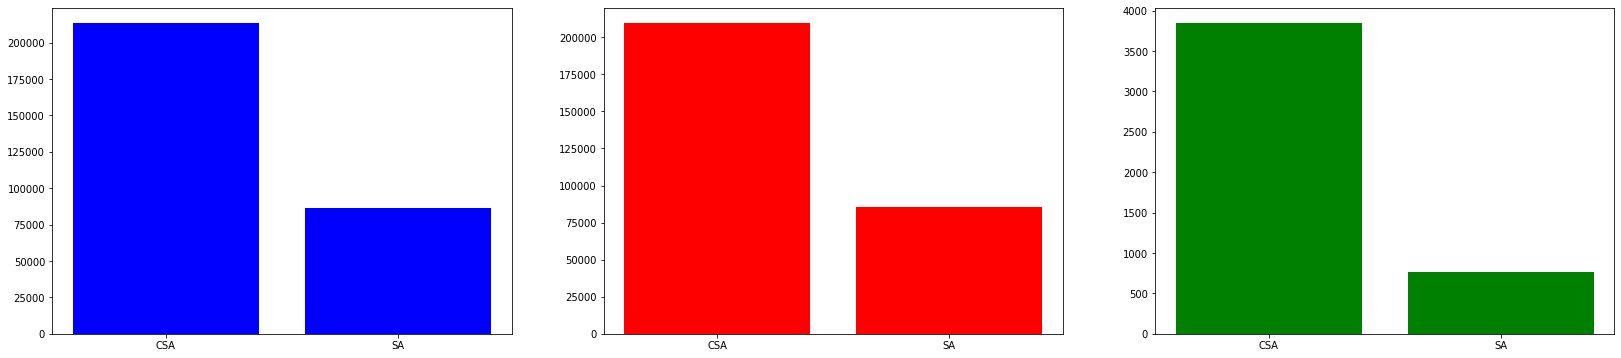

In [13]:
plotCols(newData,'ACT_TYPE')

In [0]:
leACT_TYPE = LabelEncoder()

In [15]:
labelEncodeCol(newData,'ACT_TYPE',leACT_TYPE)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


LabelEncoder()

### Analysis of Gender

In [16]:
newData['GENDER'].unique()

array(['M', 'F', nan], dtype=object)

In [0]:
def genderFill(df):
    df['GENDER'].fillna(str(df['GENDER'].mode().values[0]),inplace=True)

In [18]:
genderFill(newData)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


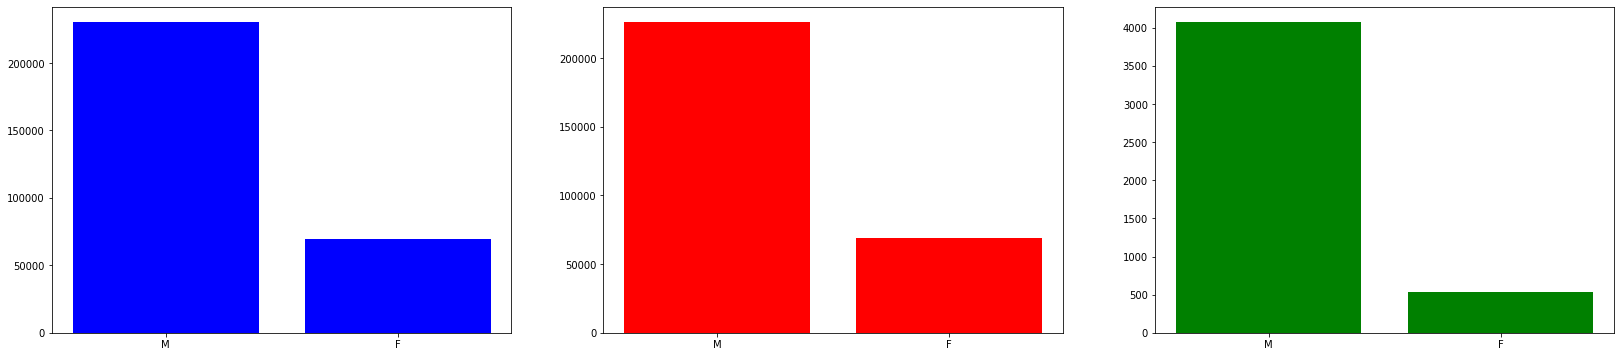

In [19]:
plotCols(newData,'GENDER')

In [0]:
leGENDER = LabelEncoder()

In [21]:
labelEncodeCol(newData,'GENDER',leGENDER)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


LabelEncoder()

### Analysis on AGE

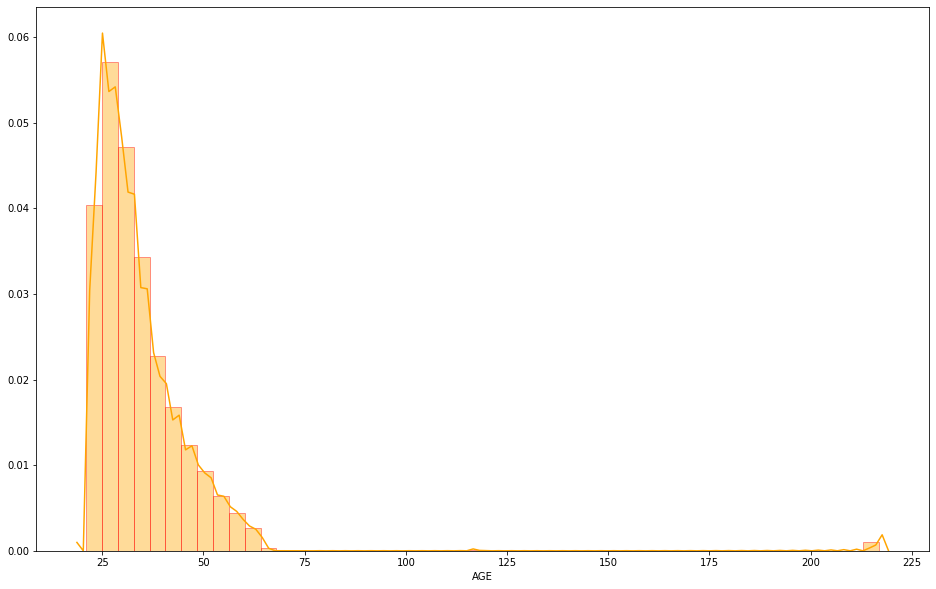

In [22]:
plotDist(newData.AGE)

In [23]:
newData['AGE'][newData['AGE'] > 100].count()

1305

In [0]:
newData = newData[newData['AGE'] <= 100]

In [25]:
newData['AGE'].describe()

count    298695.000000
mean         33.355416
std           9.493298
min          21.000000
25%          26.000000
50%          31.000000
75%          38.000000
max          65.000000
Name: AGE, dtype: float64

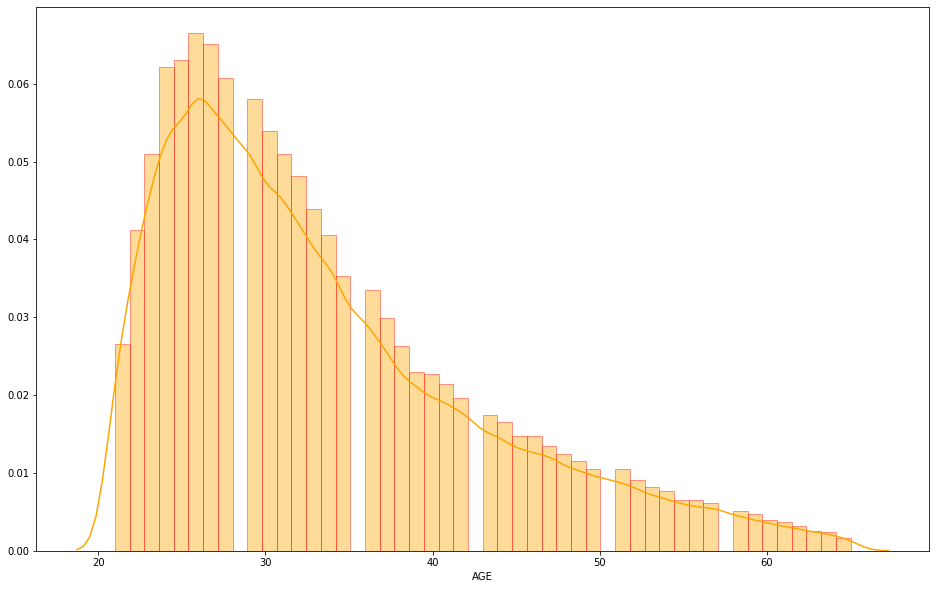

In [26]:
plotDist(newData.AGE)

### Analysis on Legal Entity

In [27]:
newData['LEGAL_ENTITY'].unique()

array(['INDIVIDUAL', 'OTHERS', 'NON_GOVERNMENTAL_ORG', 'FIRM'],
      dtype=object)

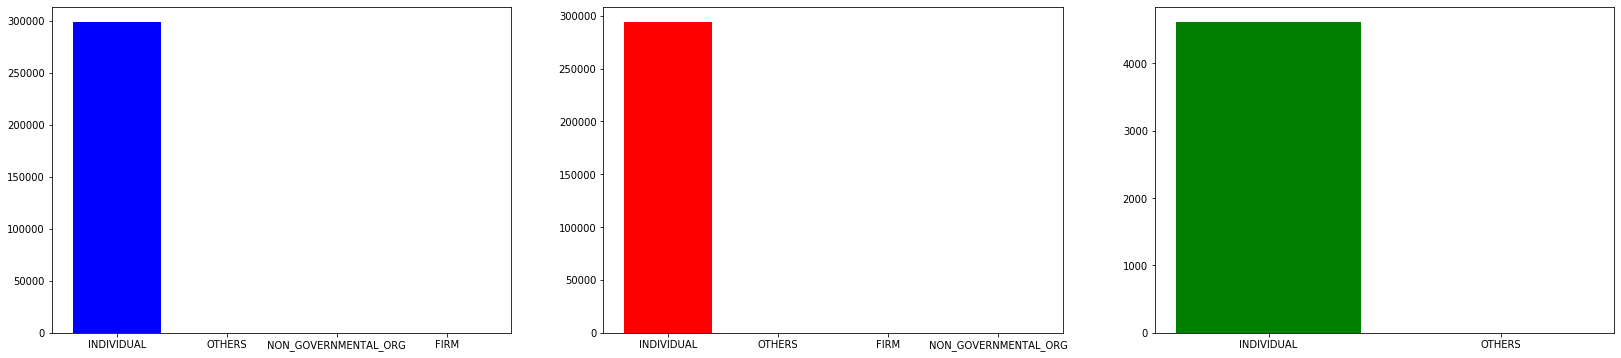

In [28]:
plotCols(newData,'LEGAL_ENTITY')

In [0]:
leLEGAL_ENTITY = LabelEncoder()

In [30]:
labelEncodeCol(newData,'LEGAL_ENTITY',leLEGAL_ENTITY)

LabelEncoder()

### Analysis on Occupation

In [31]:
newData['OCCUP_ALL_NEW'].unique()

array(['SALARIED'], dtype=object)

In [0]:
newData.drop('OCCUP_ALL_NEW',axis=1,inplace=True)

### Analysis of Average Monthly Balance

In [0]:
AMB = ['AMB_MON_01','AMB_MON_02','AMB_MON_03','AMB_MON_04']

In [34]:
newData[AMB].corr()

,AMB_MON_01,AMB_MON_02,AMB_MON_03,AMB_MON_04
AMB_MON_01,1.000000,0.844099,0.723092,0.648993
AMB_MON_02,0.844099,1.000000,0.863011,0.750984
AMB_MON_03,0.723092,0.863011,1.000000,0.868657
AMB_MON_04,0.648993,0.750984,0.868657,1.000000


In [0]:
def ambFill(df,listofcols):
    '''For fill na value in AMB_MON_0*(should be in asc order).'''
    for i in range(1,len(listofcols)):
        df[listofcols[i]][df[listofcols[i]].isnull()] = df[listofcols[i-1]][df[listofcols[i]].isnull()]

In [36]:
ambFill(newData,AMB)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [37]:
newData.isnull().any()[newData.isnull().any().values == True]

ZIP_CODE_FINAL    True
EOP_MON_02        True
EOP_MON_03        True
dtype: bool

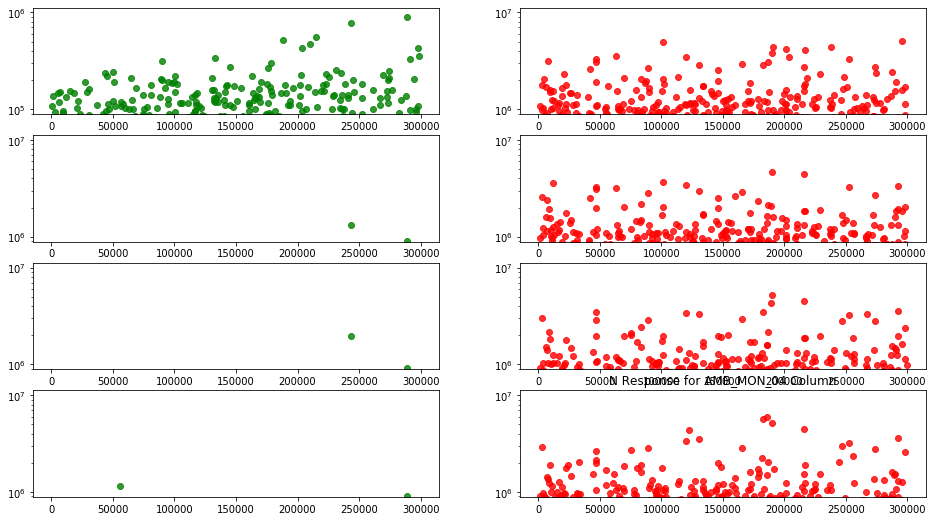

In [38]:
fig, axs = plt.subplots(4,2,figsize=(16,9))
y=0
x=0
for col in AMB:
    y=0
    cl = 'g'
    if x == 4:
        break
    for res in ['Y','N']:
        plt.title('{} Response for {} Column'.format(res,col))
        axs[x,y].scatter(newData[col][newData.RESPONDERS == res].sort_index().index, newData[col][newData.RESPONDERS == res].sort_index().values,color = cl,alpha=0.8)
        axs[x,y].set_yscale('log')
        y += 1
        cl = 'r'
    x += 1
plt.show()

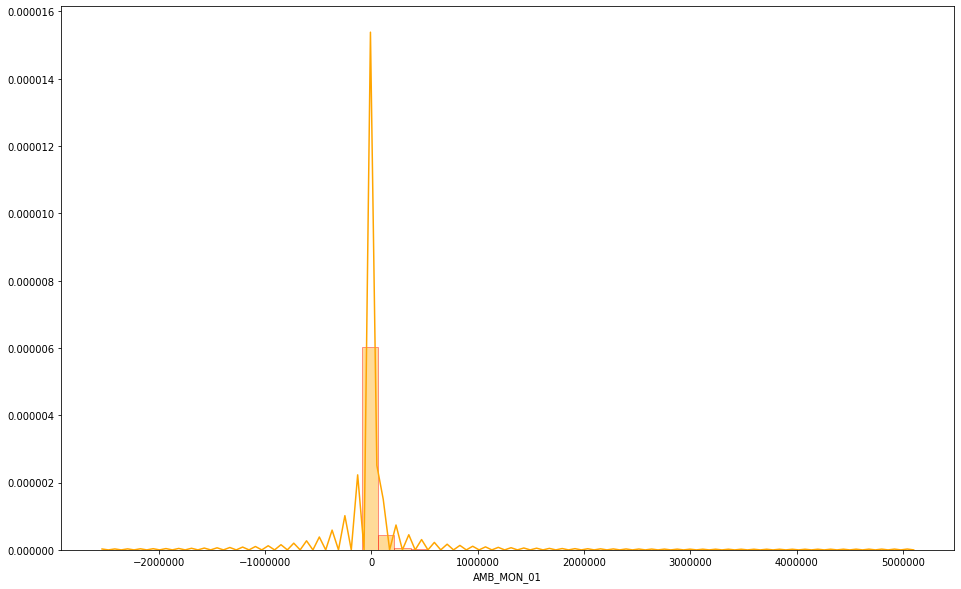

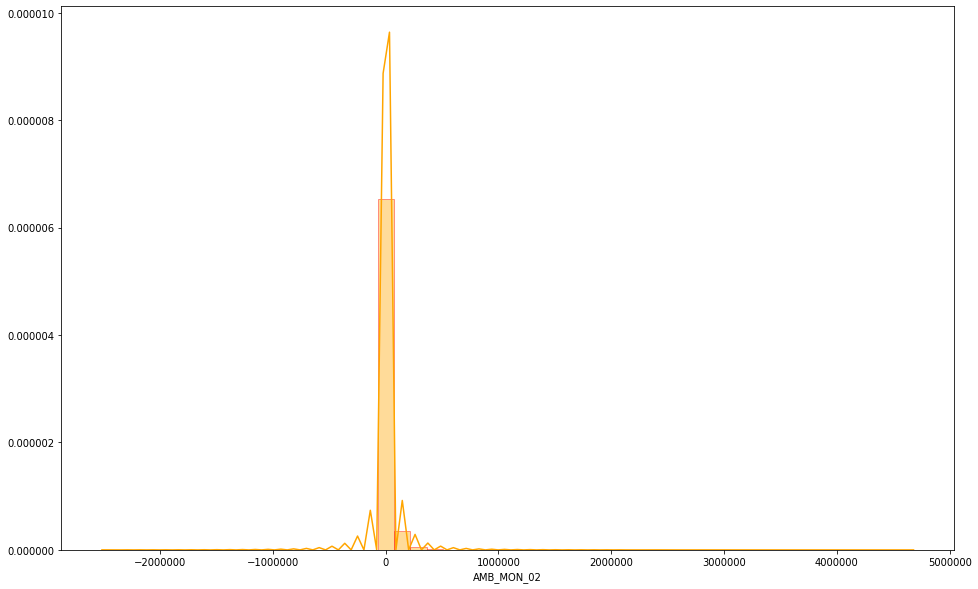

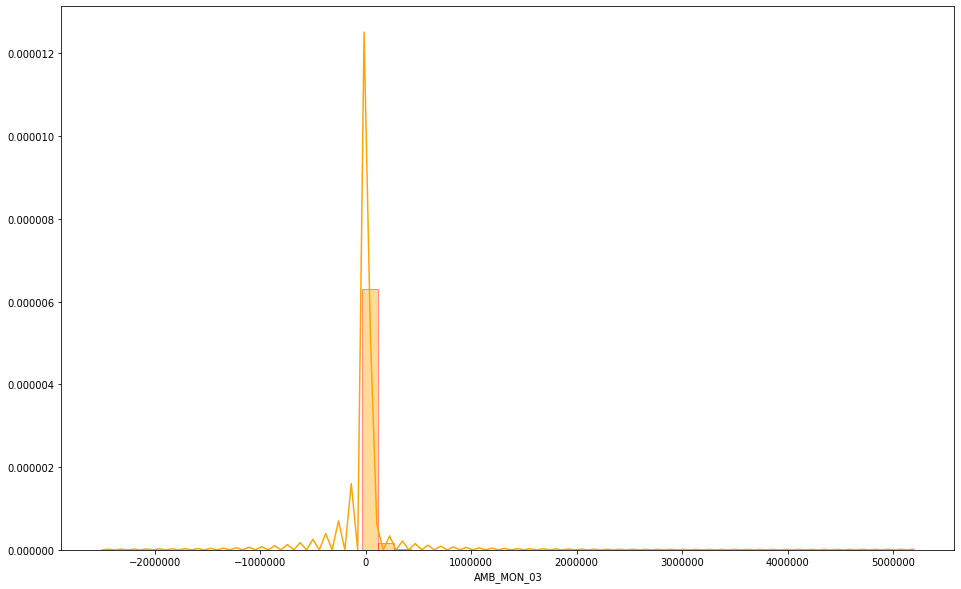

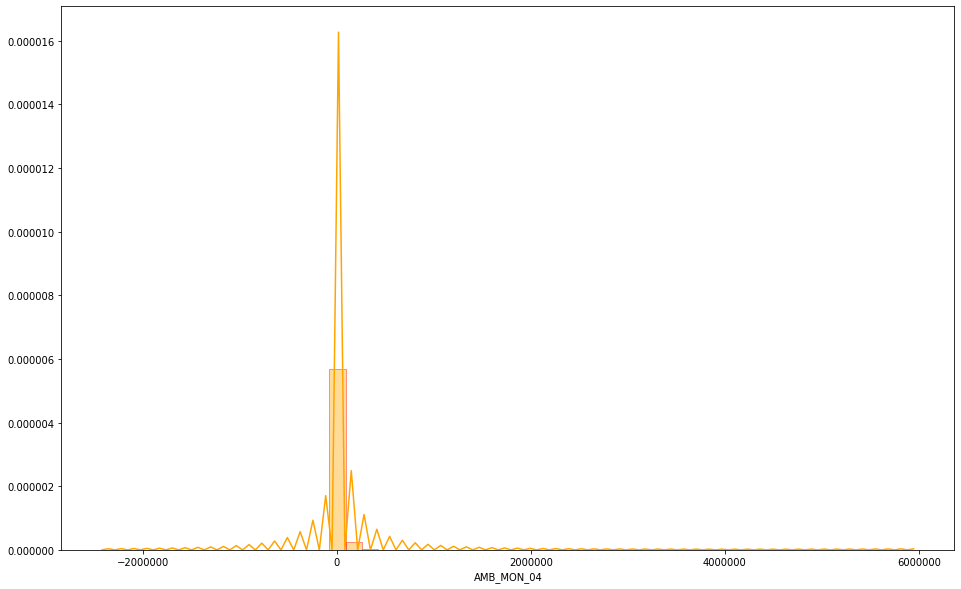

In [39]:
for x in AMB:
    plotDist(newData[x])
    print('\n')

### Analysis of Zipcode

In [40]:
newData['ZIP_CODE_FINAL'].dtype

dtype('O')

In [41]:
dicti = {'float':0,'int':0,'str':0}
for x in newData.ZIP_CODE_FINAL:
    if type(x) == str:
        dicti['str'] += 1
    elif type(x) == float:
        dicti['float'] += 1
    elif type(x) == int:
        dicti['int'] += 1
print(dicti)

{'float': 110423, 'int': 0, 'str': 188272}


In [0]:
def cleaningZipCode(df):
    print('ZIP_CODE Columns has {} Null Values.'.format(df.ZIP_CODE_FINAL.isnull().sum()))
    ind =[]
    # count = len(df)
    # countl = len(df)
    for index, value in enumerate(df.ZIP_CODE_FINAL):
        # print(index,value)
        try:
            if (len(str(value)) < 5):
                df.ZIP_CODE_FINAL.iloc[index] = 'EMPTY'
                # print('\'{}\' index will be chenged to \'{}\' value.\n'.format(index,df.ZIP_CODE_FINAL.iloc[index]))
            elif ' ' in str(value):
                df.ZIP_CODE_FINAL.iloc[index] = str(value).split(' ')[0] + str(value).split(' ')[1]
                # print("'{}' value for index '{}' was replaced with '{}'\n".format(value,index,df.ZIP_CODE_FINAL.iloc[index]))
            elif '.' in str(value):
                df.ZIP_CODE_FINAL.iloc[index] = str(value).split('.')[0]
                # print("'{}' value for index '{}' was replaced with '{}'\n".format(value,index,df.ZIP_CODE_FINAL.iloc[index]))
            else:
                df.ZIP_CODE_FINAL.iloc[index] = str(value)
        except ValueError:
            print('\'{}\' value is giving ValueError'.format(value))
            print('Record with index \'{}\' will be droped\n')
            ind.append(index)
        # count -= 1
        # print('{}%'.format(round((((abs(count-countl))/countl)*100),2)))
        # clear_output()
    df.drop(index,inplace=True)
    print('index droped {}'.format(x for x in ind))

In [43]:
cleaningZipCode(newData)

ZIP_CODE Columns has 2140 Null Values.


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


index droped <generator object cleaningZipCode.<locals>.<genexpr> at 0x7f11cac89b48>


In [0]:
leZIP_CODE_FINAL = LabelEncoder()

In [45]:
labelEncodeCol(newData,'ZIP_CODE_FINAL',leZIP_CODE_FINAL)

LabelEncoder()

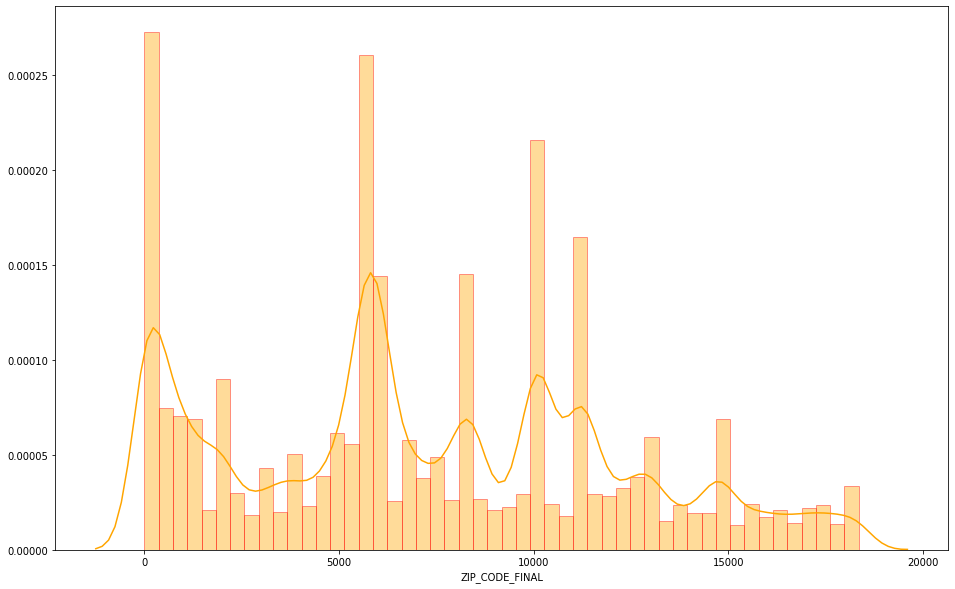

In [46]:
plotDist(newData.ZIP_CODE_FINAL)

### Analysis on EOP MON

In [47]:
EOP = ['EOP_MON_02','EOP_MON_03']
newData[EOP].describe()

,EOP_MON_02,EOP_MON_03
count,2.977050e+05,2.959260e+05
mean,2.159326e+04,2.166123e+04
std,6.836846e+04,6.662510e+04
min,-2.511007e+06,-2.511007e+06
25%,0.000000e+00,0.000000e+00
50%,1.453000e+03,1.584200e+03
75%,1.961592e+04,2.032641e+04
max,5.366019e+06,7.500850e+06


In [48]:
newData[EOP].head()

,EOP_MON_02,EOP_MON_03
0,0.00,0.00
1,3016.77,3.02
2,9999.00,14858.75
3,27163.10,49675.27
4,21065.87,983.87


In [0]:
def fillZeroNull(df,cols):
    for col in cols:
        print('\n{} has {} null values'.format(col,df[col].isnull().sum()))
        df.fillna(0,inplace=True)
    print('Now:\n')
    newData[EOP].isnull().sum()

In [50]:
fillZeroNull(newData, EOP)


EOP_MON_02 has 989 null values

EOP_MON_03 has 0 null values
Now:



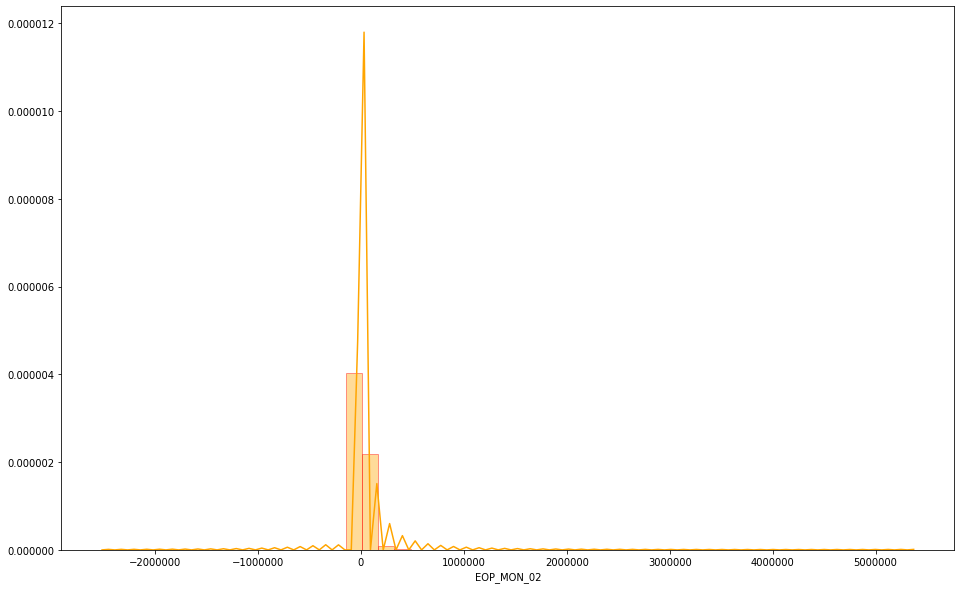

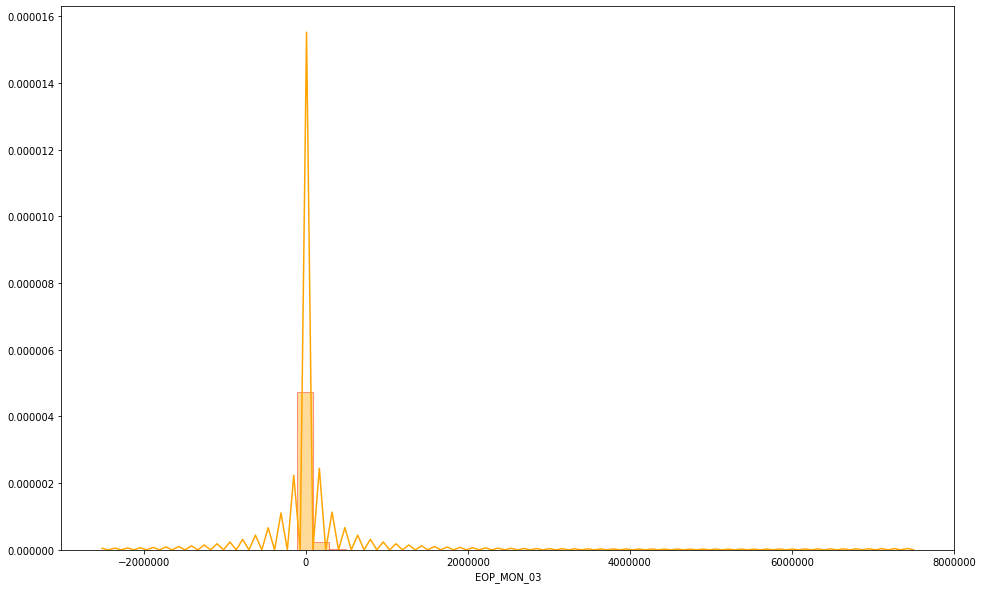

In [51]:
for col in EOP:
    plotDist(newData[col])

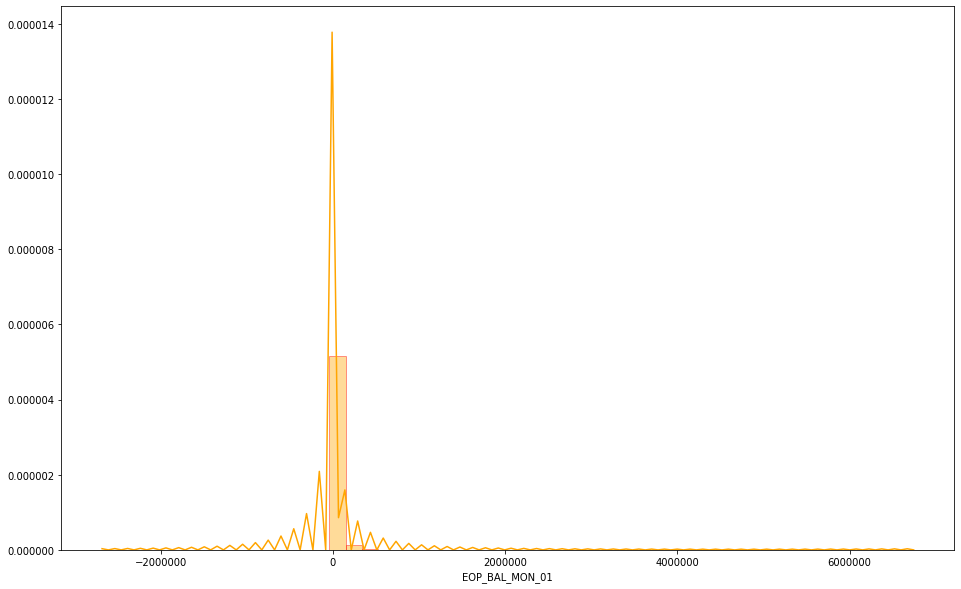

In [52]:
plotDist(newData.EOP_BAL_MON_01)

### Analysis on Binary Data Columns

In [0]:
def listBinCols(df):
    bincols = []
    for col in df.columns:
        if df[col].nunique() == 2:
            if sorted(df[col].unique()) == ['N','Y']:
                bincols.append(col)
                # print('{} Column has {} unique values'.format(col,df[col].unique()))
    return bincols

In [0]:
binCols = listBinCols(newData)

CC_HOLD


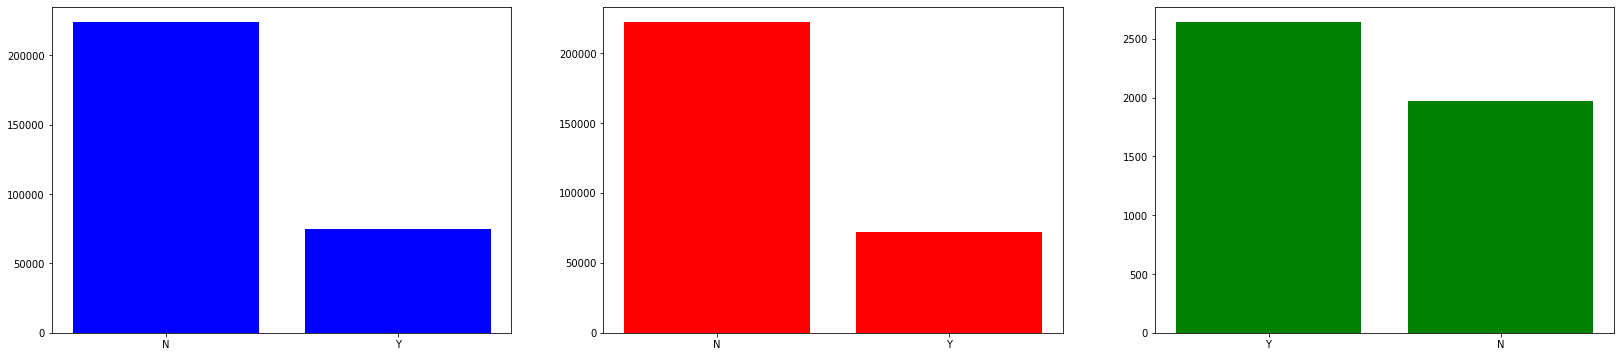

CC_ACTIVE


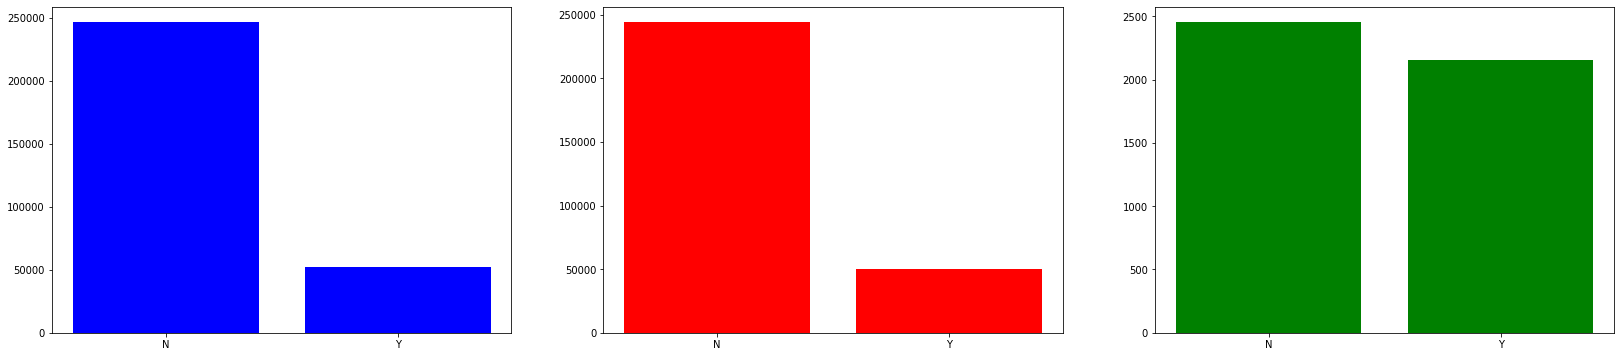

DC_HOLD


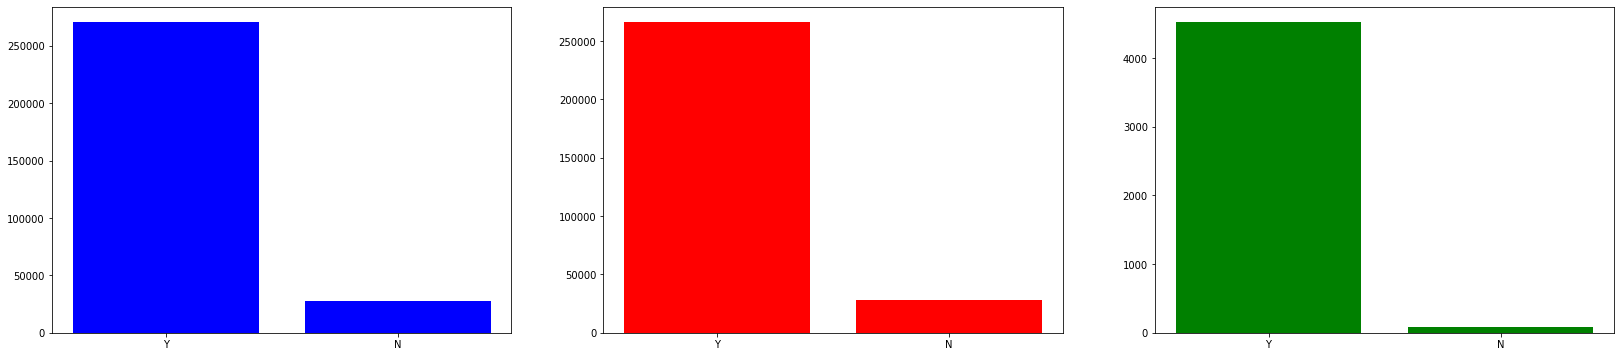

DC_ACTIVE


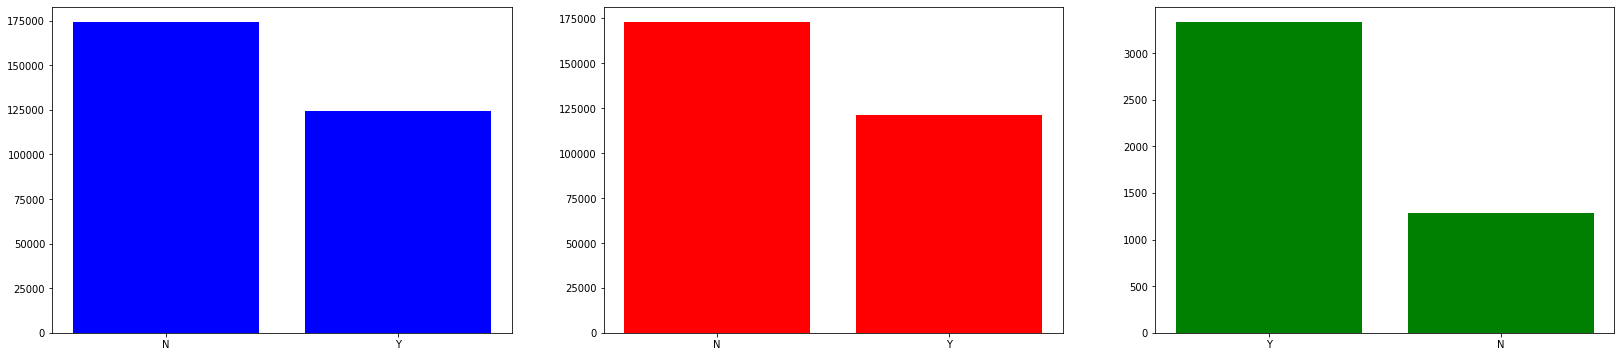

FINANCE_MON_01


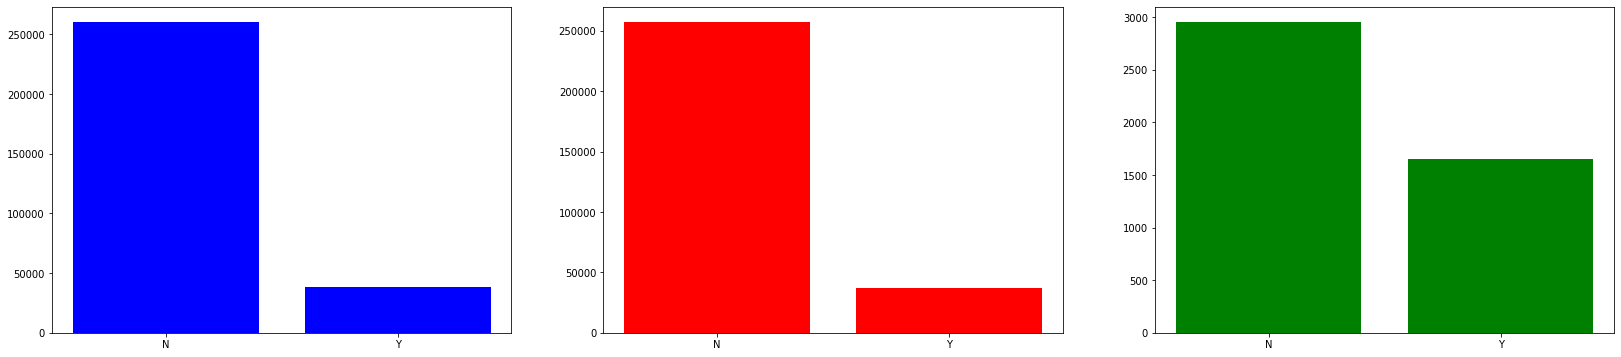

JOBS_MON_01


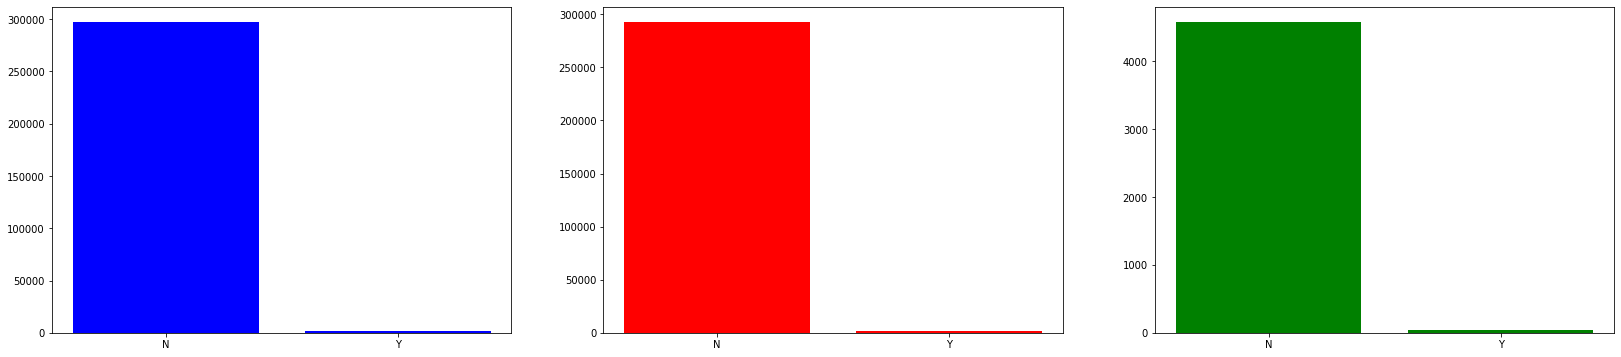

LIFESTYLE_MON_01


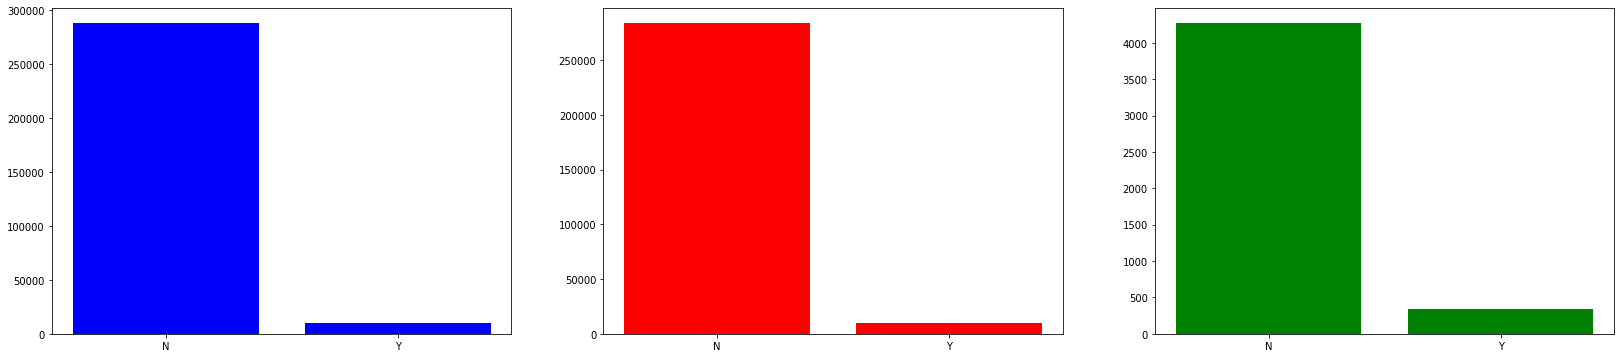

INMON_01KET_MON_01


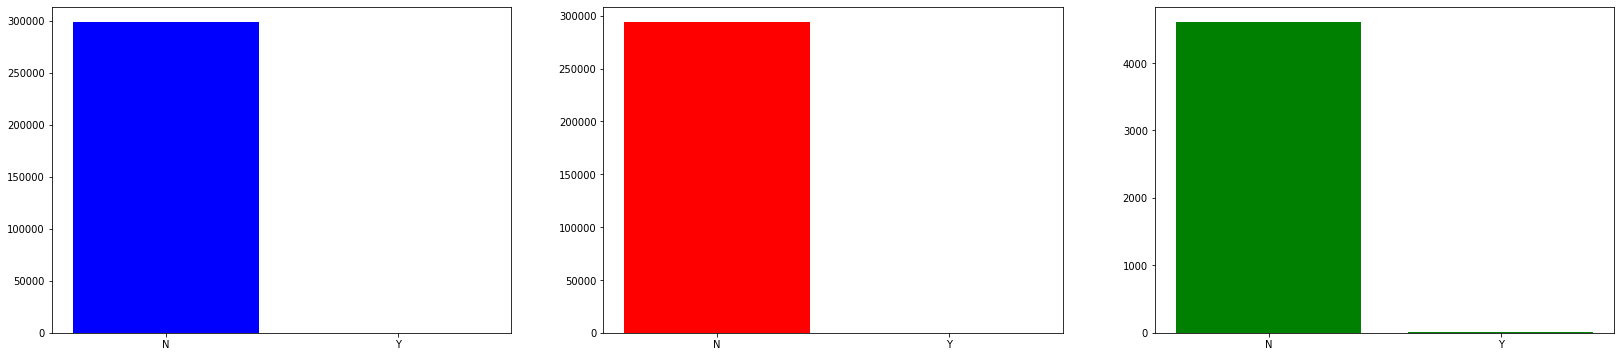

TRAVEL_MON_01


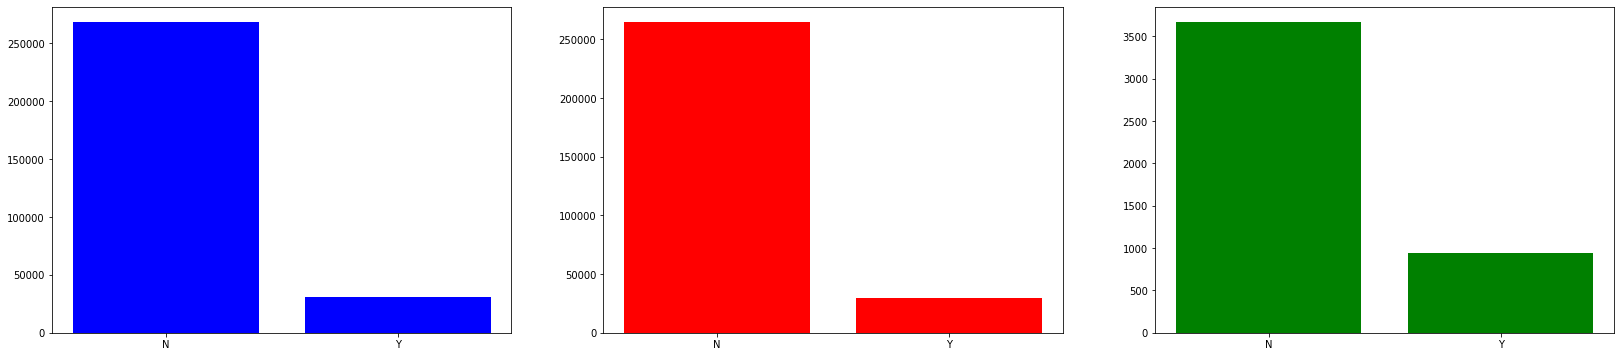

TOP14_CITY


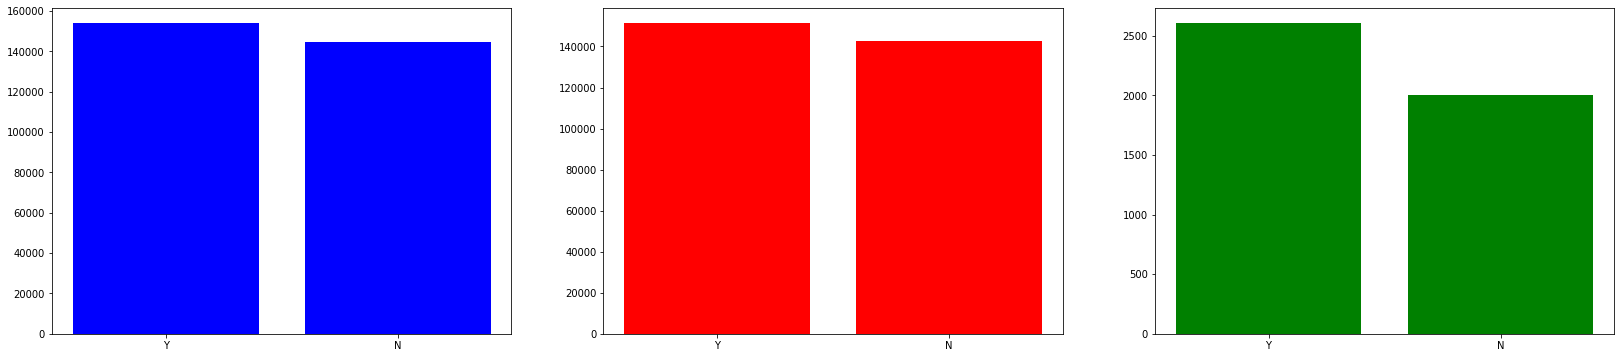

TOP9_CITY


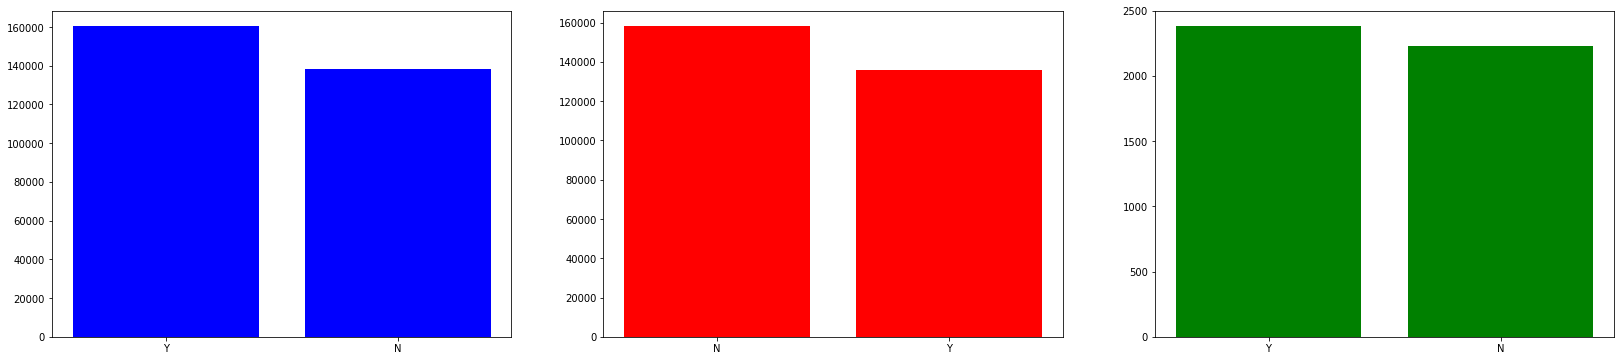

CARD_AUTOMOBILE_MON_01


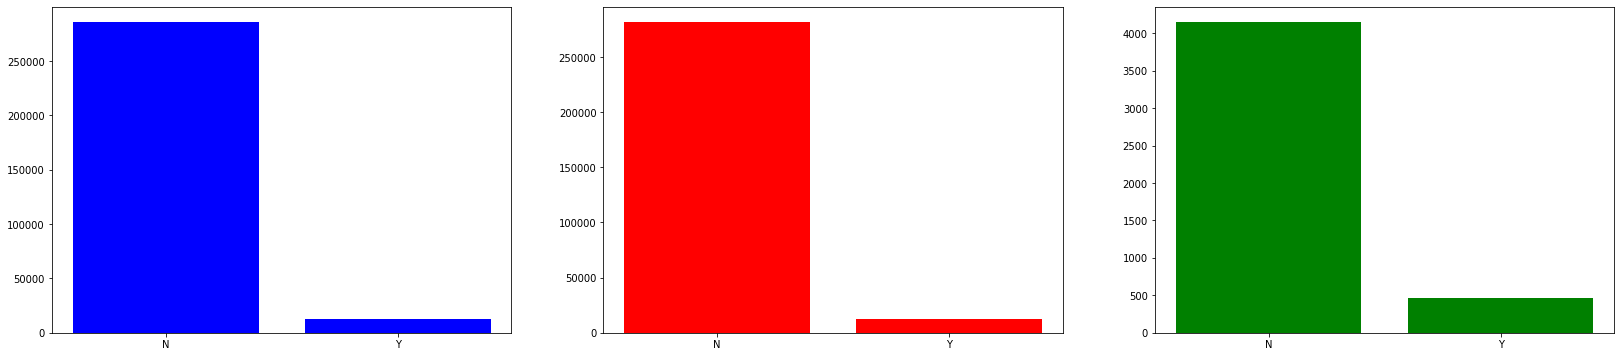

CARD_HOTEL_MON_01


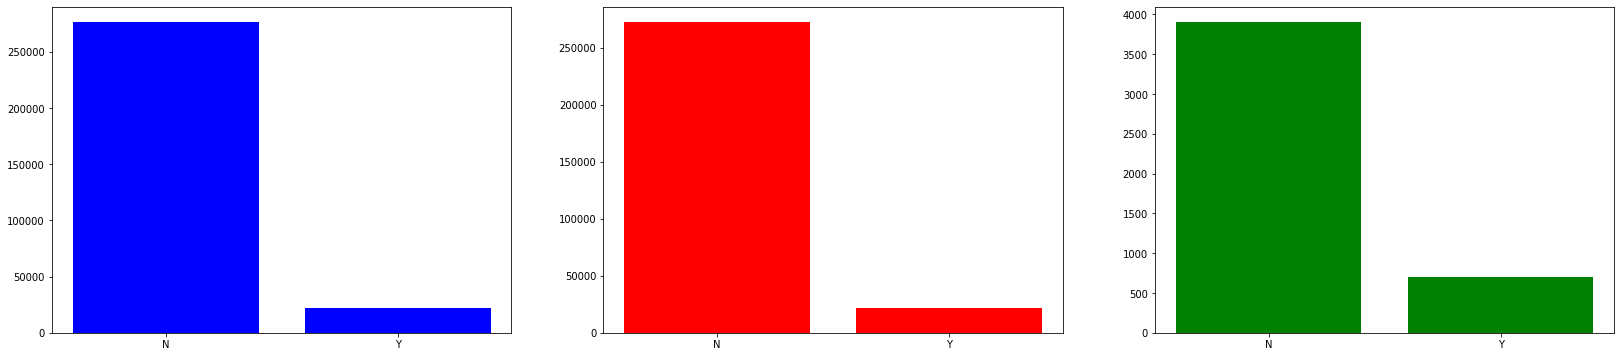

CARD_JEWELLERY_MON_01


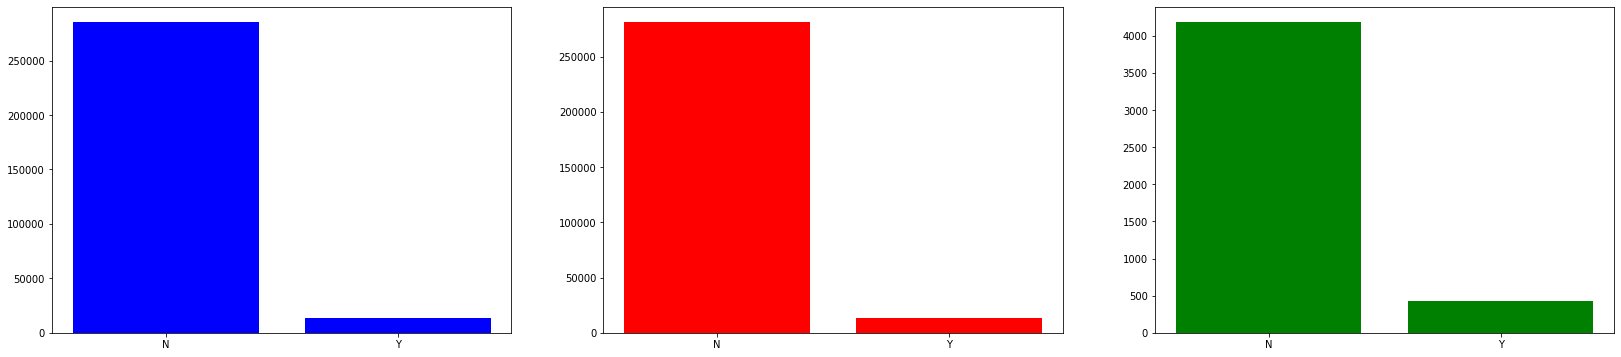

CARD_RESTAURANT_MON_01


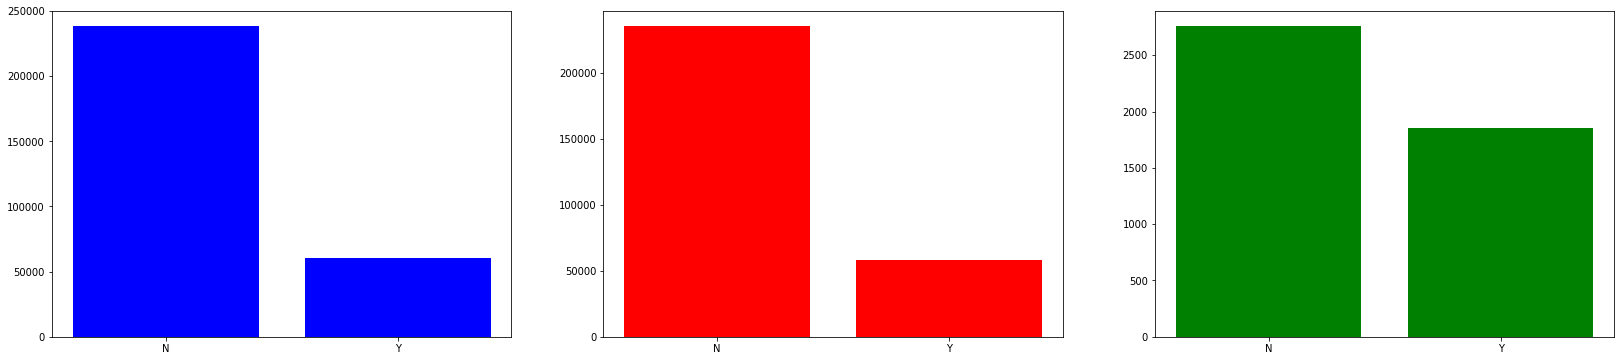

CARD_TRAVEL_MON_01


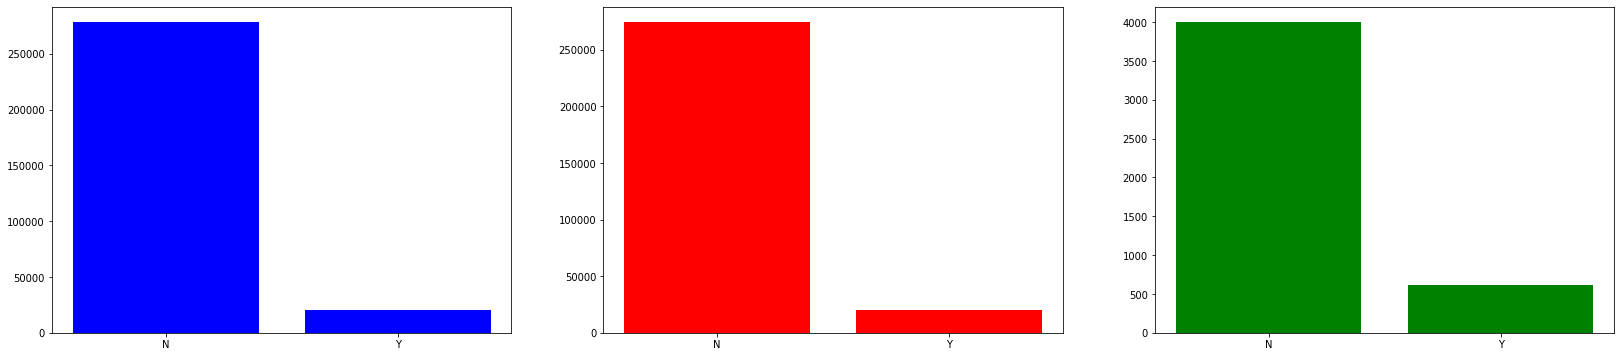

CARD_PRSNL_CARE_MON_01


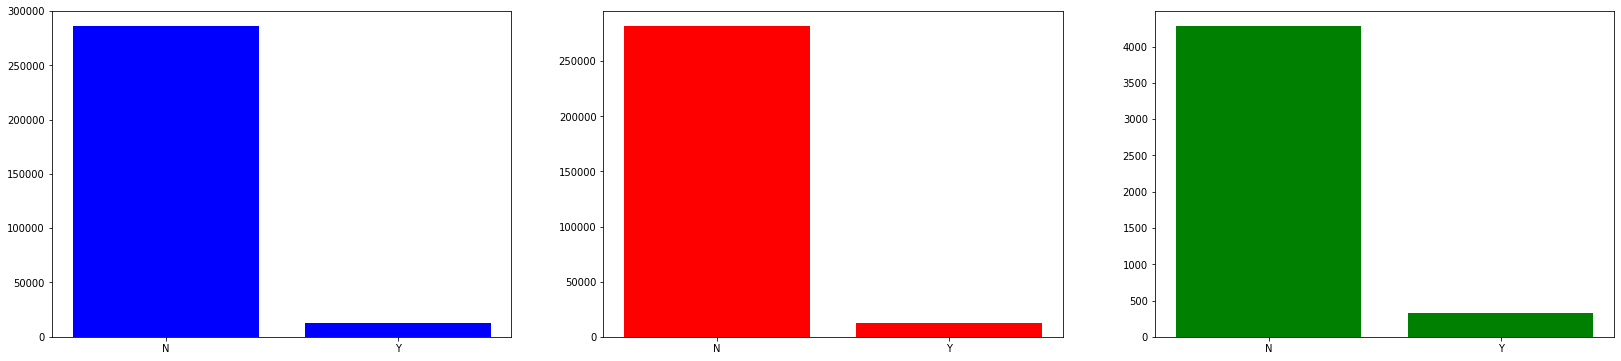

CARD_HOBBY_MON_01


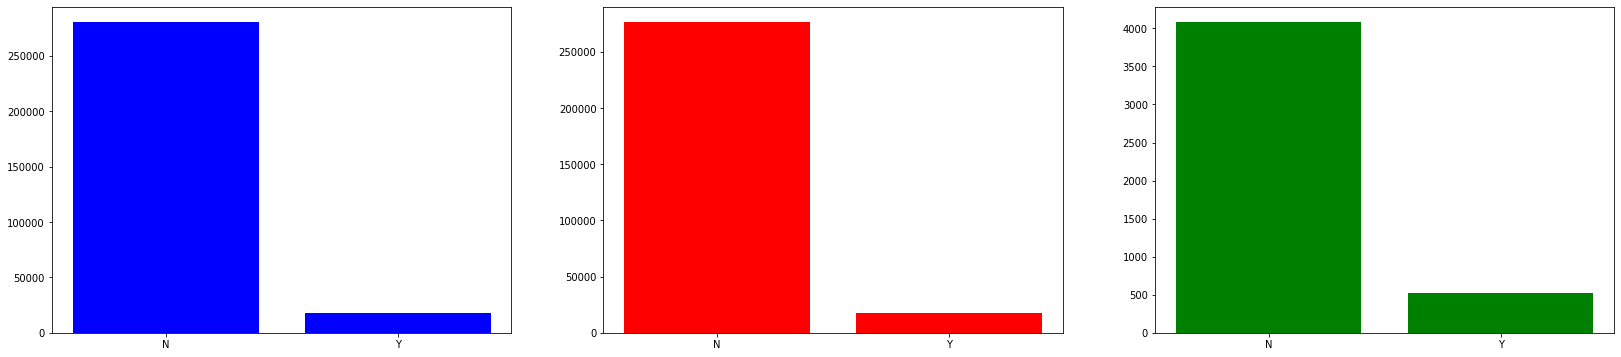

CARD_HOME_DECOR_MON_01


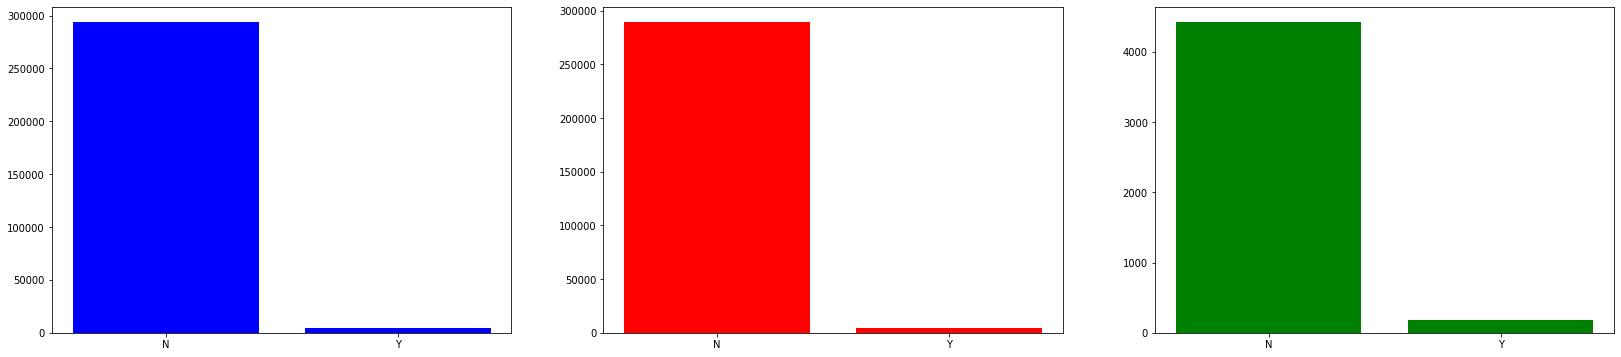

CARD_MEDICAL_MON_01


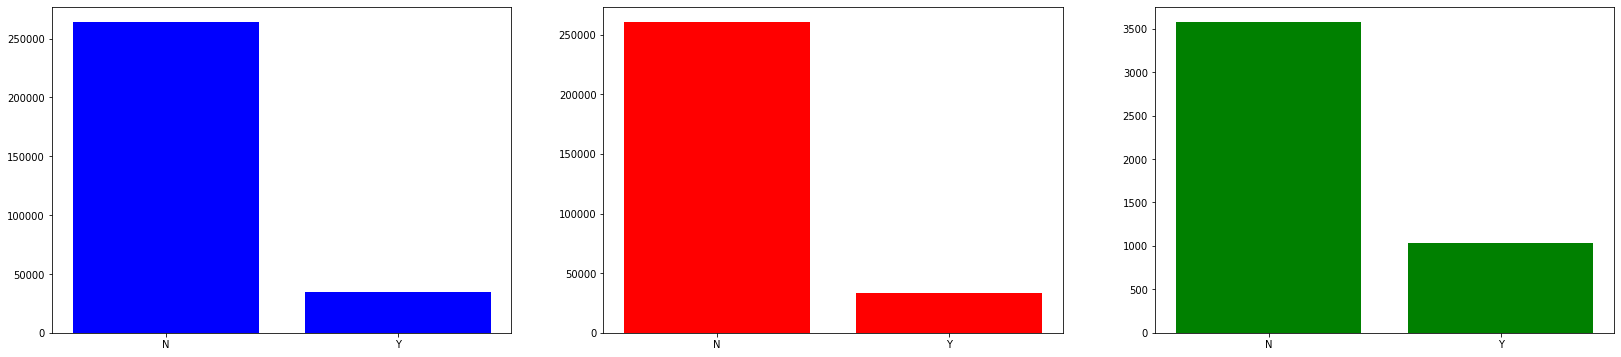

CARD_ENTMNT_MON_01


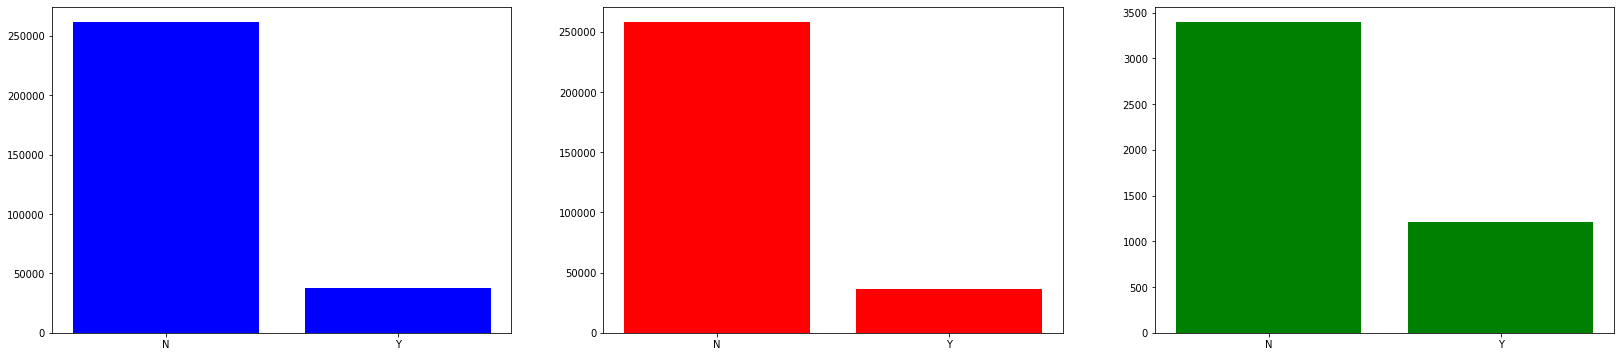

In [55]:
for col in binCols:
    if col !='RESPONDERS':
        print(col)    
        plotCols(newData,col)

In [0]:
leBin = LabelEncoder()

In [0]:
for col in binCols:
    labelEncodeCol(newData,col,leBin)

### Analysis on CHANNEL_CLICK_DISP

In [58]:
newData.CHANNEL_CLICK_DISP.nunique()

3

In [59]:
newData.CHANNEL_CLICK_DISP.unique()

array(['NONE', 'DISP', 'CLICK'], dtype=object)

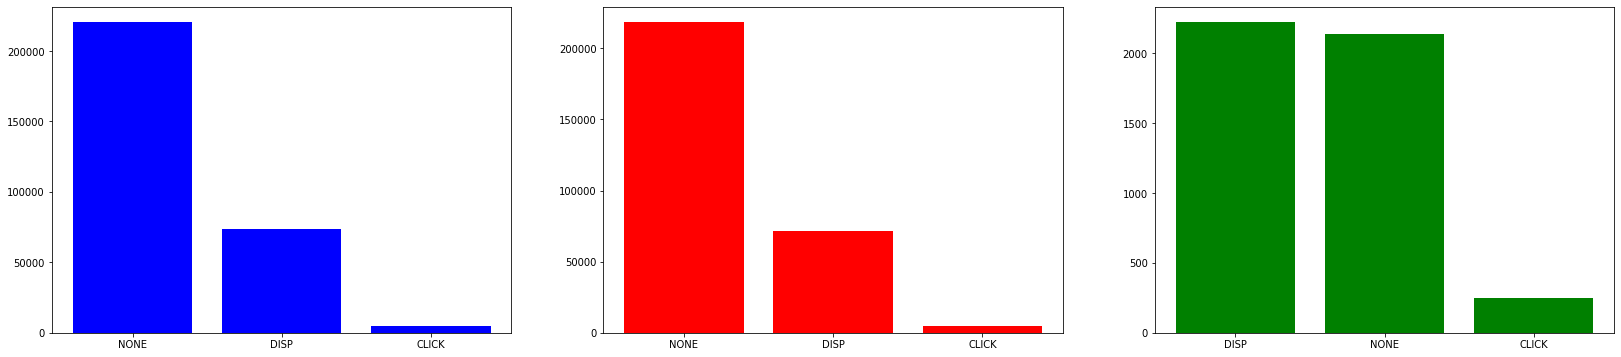

In [60]:
plotCols(newData,'CHANNEL_CLICK_DISP',True)

In [0]:
leCHANNEL_CLICK_DISP = LabelEncoder()

In [62]:
labelEncodeCol(newData,'CHANNEL_CLICK_DISP',leCHANNEL_CLICK_DISP)

LabelEncoder()

### Analysis on Designation

In [63]:
newData.DESIGNATION_FINAL.unique()

array(['MISSING', 'ENGINEER', 'MANAGER', 'EXECUTIVE', 'SUP/TECH/OPR',
       'OFFICER', 'OTHERS', 'DEVEP/PROG/ANALYST/ASSO', 'REMAING',
       'TOP_MANAG/DOC', 'TEACH/PROF/CONSULT'], dtype=object)

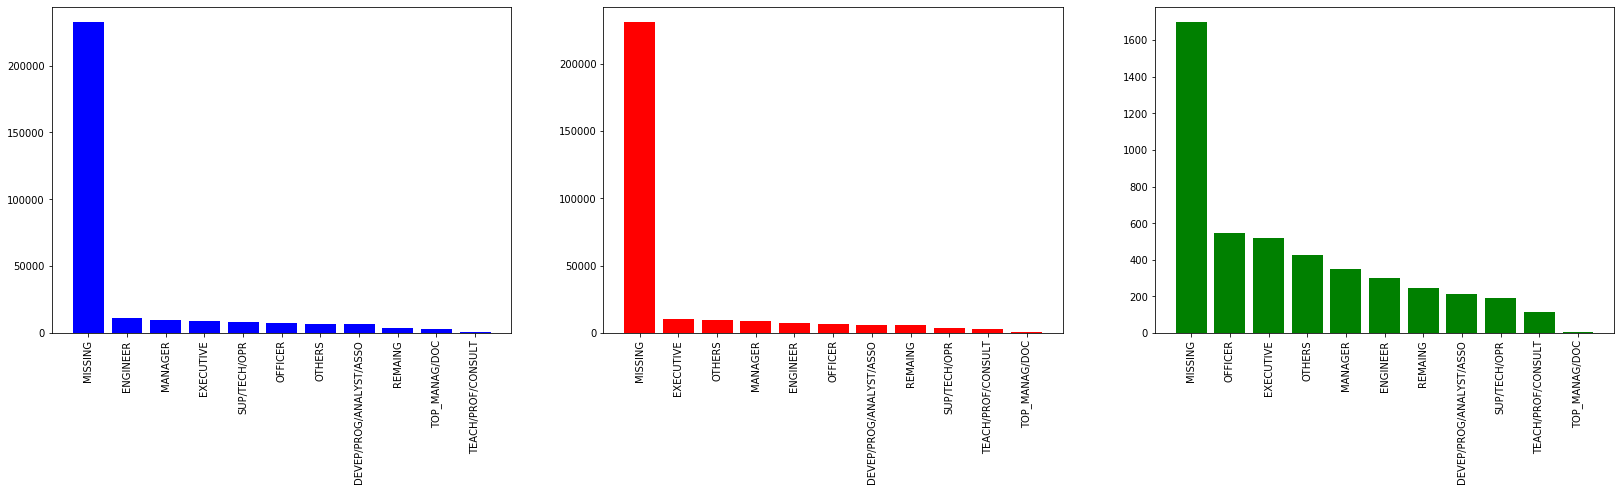

In [64]:
plotCols(newData,'DESIGNATION_FINAL',True,'rot')

In [0]:
leDESIGNATION_FINAL = LabelEncoder()

In [66]:
labelEncodeCol(newData,'DESIGNATION_FINAL',leDESIGNATION_FINAL)

LabelEncoder()

### Analysis on CC DC Catogories

In [0]:
ccdc = sorted(['NEFT_CC_CATEGORY', 'NEFT_DC_CATEGORY', 'TPT_DC_CATEGORY_MON_01',
       'TPT_CC_CATEGORY_MON_01', 'IMPS_CC_CATEGORY_MON_01'])

In [0]:
leIMPS_CC_CATEGORY_MON_01 = LabelEncoder()
leNEFT_CC_CATEGORY = LabelEncoder()
leNEFT_DC_CATEGORY = LabelEncoder()
leTPT_CC_CATEGORY_MON_01 = LabelEncoder()
leTPT_DC_CATEGORY_MON_01 = LabelEncoder()

In [0]:
ccdcEn = [leIMPS_CC_CATEGORY_MON_01,
leNEFT_CC_CATEGORY,
leNEFT_DC_CATEGORY,
leTPT_CC_CATEGORY_MON_01,
leTPT_DC_CATEGORY_MON_01]

In [0]:
ccdcEnList = list(zip(ccdc,ccdcEn))

IMPS_CC_CATEGORY_MON_01


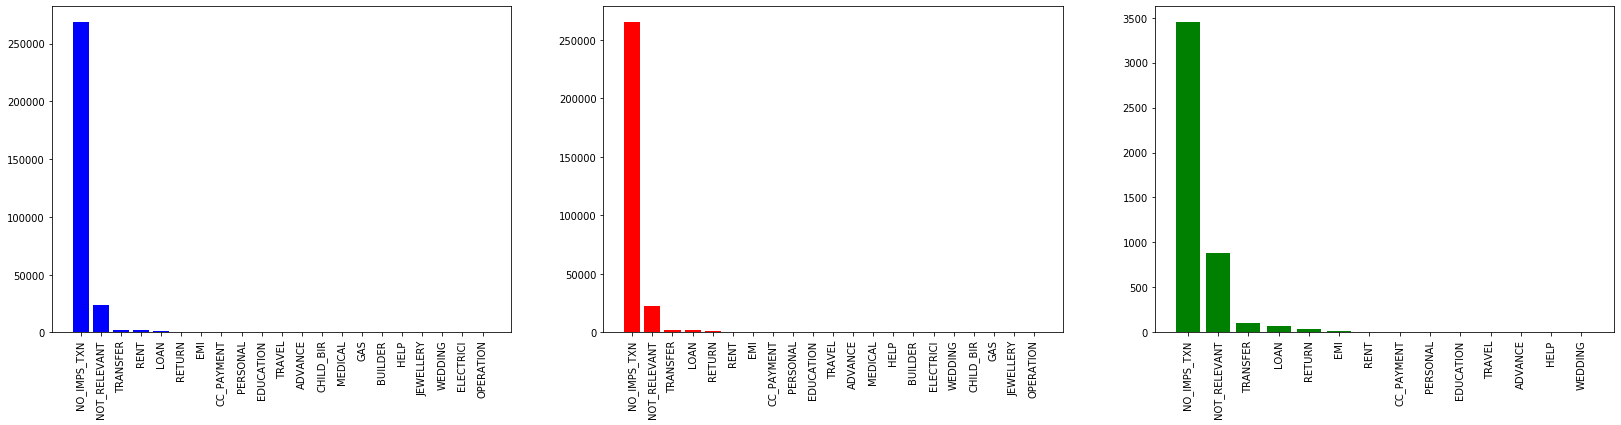

NEFT_CC_CATEGORY


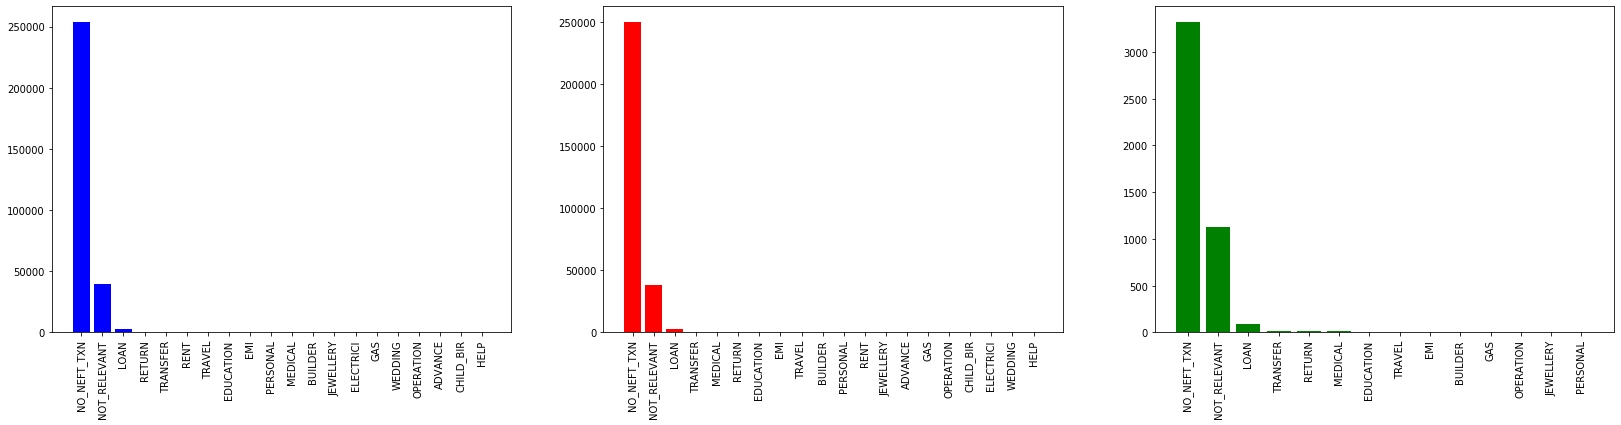

NEFT_DC_CATEGORY


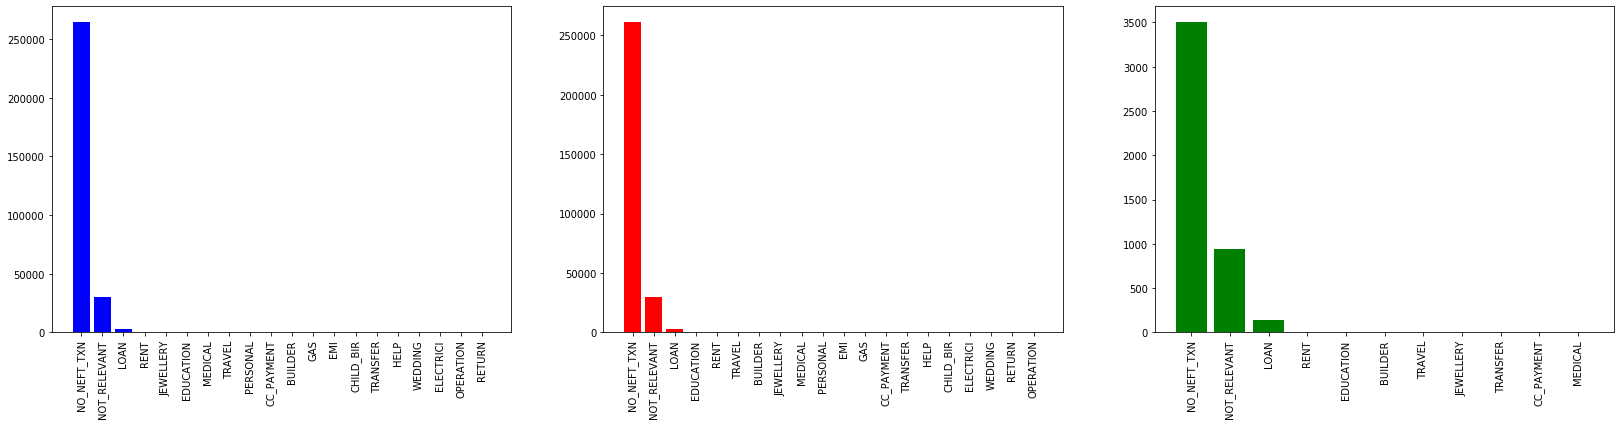

TPT_CC_CATEGORY_MON_01


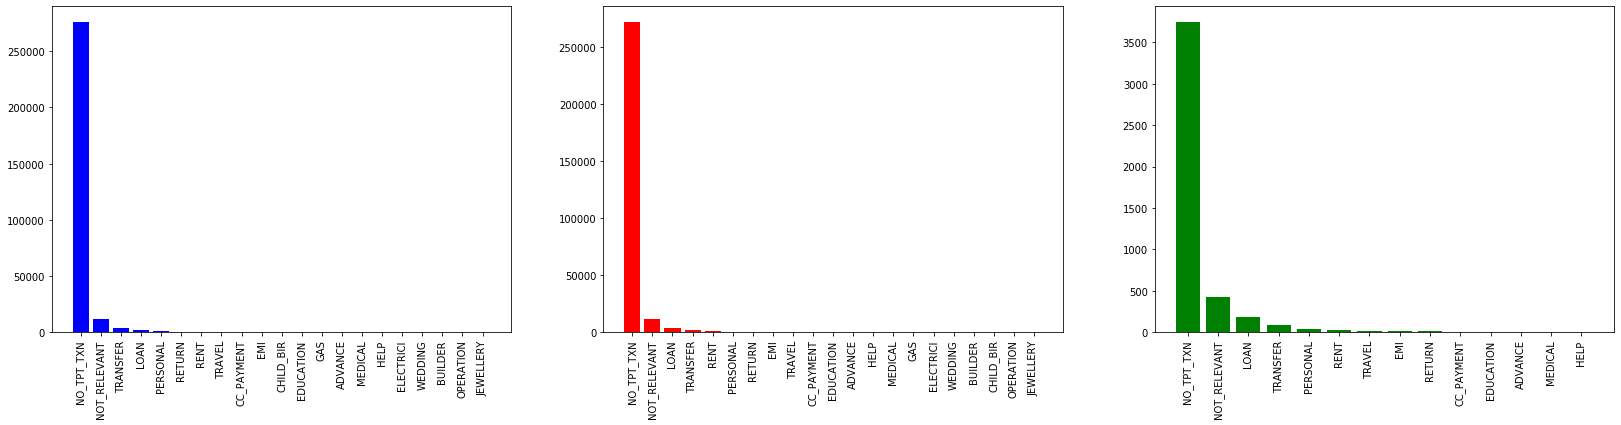

TPT_DC_CATEGORY_MON_01


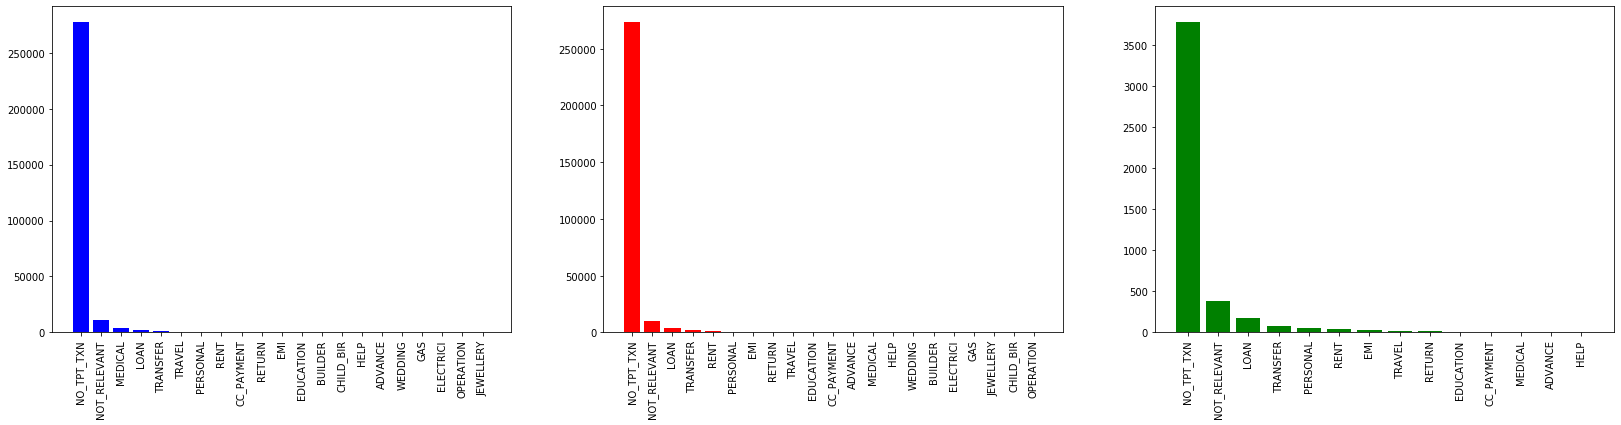

In [71]:
for col in ccdc:
    print(col)
    plotCols(newData,col,True,'rot')

In [72]:
for i in range(len(ccdcEnList)):
    print('Label Encoding Col {}'.format(ccdcEnList[i][0]))
    labelEncodeCol(newData,ccdcEnList[i][0],ccdcEnList[i][1])

Label Encoding Col IMPS_CC_CATEGORY_MON_01
Label Encoding Col NEFT_CC_CATEGORY
Label Encoding Col NEFT_DC_CATEGORY
Label Encoding Col TPT_CC_CATEGORY_MON_01
Label Encoding Col TPT_DC_CATEGORY_MON_01


In [73]:
newData.head()

,CUSTOMER_ID,ACT_TYPE,GENDER,LEGAL_ENTITY,AGE,N_CASA_MAX_BALANCE_MTD,N_CASA_MIN_BALANCE_MTD,CC_HOLD,CC_ACTIVE,DC_HOLD,DC_ACTIVE,COC_ELIGIBLE,EOP_BAL_MON_01,AMB_MON_04,AMB_MON_01,AMB_MON_02,AMB_MON_03,FINANCE_MON_01,JOBS_MON_01,LIFESTYLE_MON_01,INMON_01KET_MON_01,TRAVEL_MON_01,CHANNEL_CLICK_DISP,DESIGNATION_FINAL,TOP14_CITY,TOP9_CITY,PL2CC_ELIGIBLE,NEFT_CC_CATEGORY,NEFT_DC_CATEGORY,TPT_DC_CATEGORY_MON_01,TPT_CC_CATEGORY_MON_01,IMPS_CC_CATEGORY_MON_01,ZIP_CODE_FINAL,CARD_AUTOMOBILE_MON_01,CARD_HOTEL_MON_01,CARD_JEWELLERY_MON_01,CARD_RESTAURANT_MON_01,CARD_TRAVEL_MON_01,CARD_PRSNL_CARE_MON_01,CARD_HOBBY_MON_01,CARD_HOME_DECOR_MON_01,CARD_MEDICAL_MON_01,CARD_ENTMNT_MON_01,TOP_CORP_TAG,EOP_MON_02,EOP_MON_03,SCRUB_EMI,RESPONDERS
0,385793,0,1,1,21,0.00,0.00,0,0,1,0,0,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,2,4,1,1,0,12,12,13,13,13,5802,0,0,0,0,0,0,0,0,0,0,NONE,0.00,0.00,0.000000,0
1,286891,0,1,1,23,8243.77,7.77,0,0,1,1,0,11.77,1417.26,300.51,593.06,418.09,0,0,0,0,0,2,4,1,1,0,12,12,13,13,13,11193,0,0,0,0,0,0,0,0,0,0,NONE,3016.77,3.02,0.000000,0
2,108751,0,1,1,41,26515.00,0.00,0,0,1,0,0,26458.25,5354.65,6100.73,7955.82,11138.53,0,0,0,0,1,2,4,0,0,0,12,11,13,13,13,154,0,0,0,0,0,0,0,0,0,0,NONE,9999.00,14858.75,0.000000,0
3,278651,0,1,1,28,65917.28,8270.28,1,1,1,1,1,65917.28,113120.39,35560.81,42686.93,61593.38,1,0,0,0,0,2,4,0,0,0,12,12,13,13,13,4035,0,0,1,0,0,1,0,1,1,0,NONE,27163.10,49675.27,0.000000,0
4,23637,0,1,1,34,22260.94,6060.94,1,1,1,0,0,6172.94,9099.94,15858.71,14008.08,4570.73,0,0,0,0,0,2,1,0,0,0,12,12,13,13,12,167,0,0,0,0,0,0,0,0,1,0,NONE,21065.87,983.87,251.758794,0


### Analysis on TOP_CORP_TAG

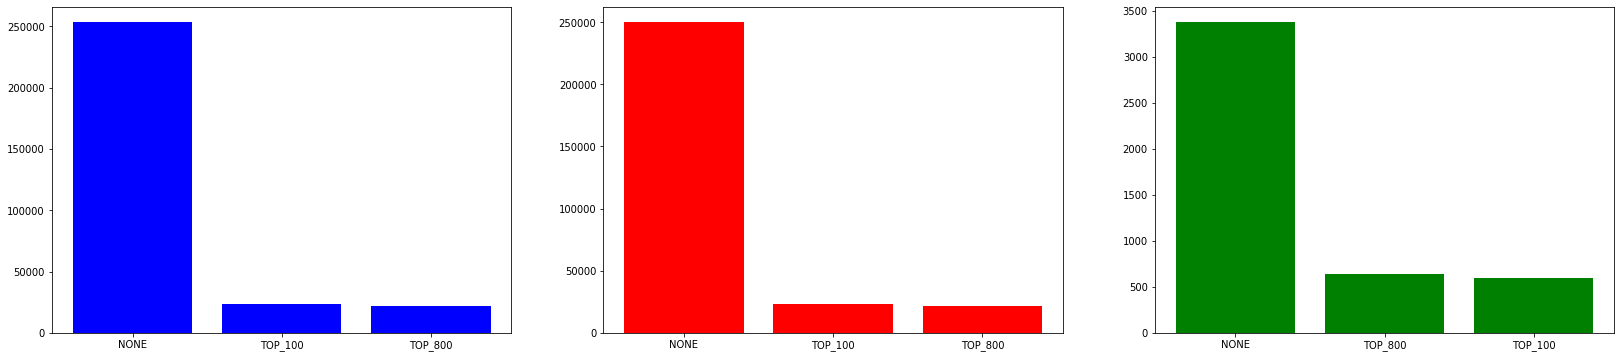

In [74]:
plotCols(newData,'TOP_CORP_TAG',True)

In [0]:
leTOP_CORP_TAG = LabelEncoder()

In [76]:
labelEncodeCol(newData,'TOP_CORP_TAG',leTOP_CORP_TAG)

LabelEncoder()

### Analysis on N_CASA_MAX_BALANCE_MTD

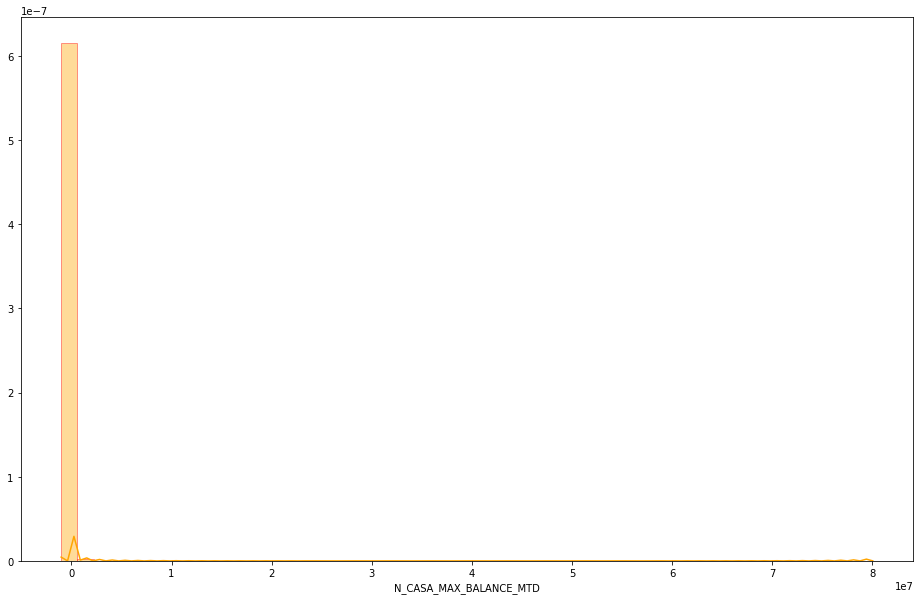

In [77]:
plotDist(newData.N_CASA_MAX_BALANCE_MTD)

### Analysis on N_CASA_MIN_BALANCE_MTD

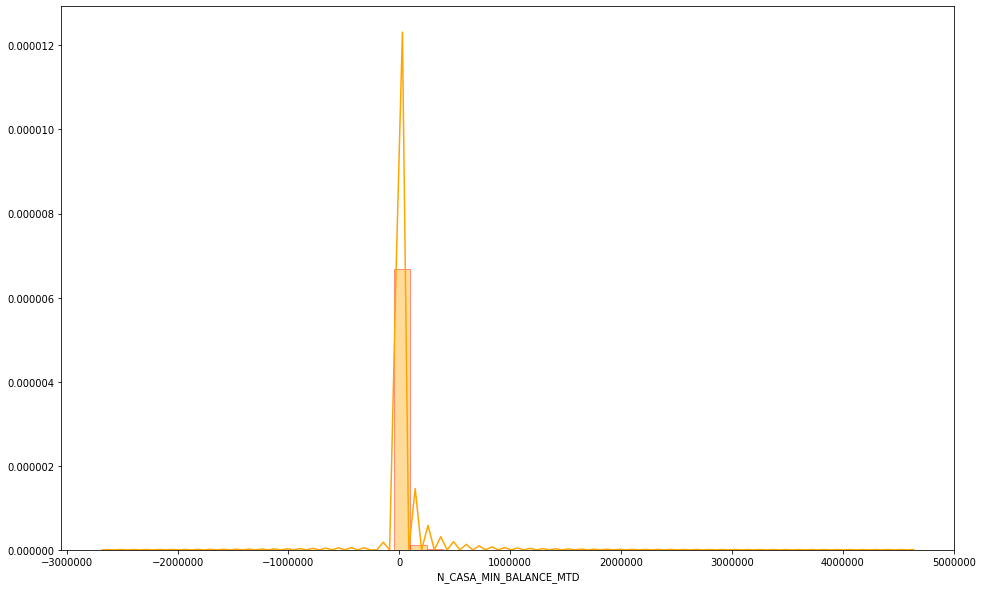

In [78]:
plotDist(newData.N_CASA_MIN_BALANCE_MTD)

### Analysis on SCRUB EMI

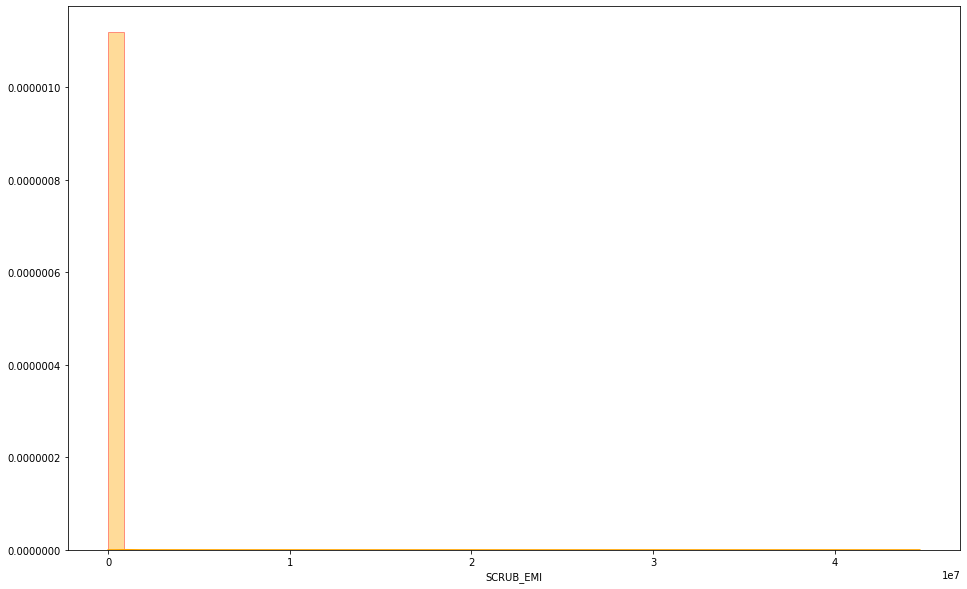

In [79]:
plotDist(newData.SCRUB_EMI)

## Preprocessing

In [80]:
newData.head()

,CUSTOMER_ID,ACT_TYPE,GENDER,LEGAL_ENTITY,AGE,N_CASA_MAX_BALANCE_MTD,N_CASA_MIN_BALANCE_MTD,CC_HOLD,CC_ACTIVE,DC_HOLD,DC_ACTIVE,COC_ELIGIBLE,EOP_BAL_MON_01,AMB_MON_04,AMB_MON_01,AMB_MON_02,AMB_MON_03,FINANCE_MON_01,JOBS_MON_01,LIFESTYLE_MON_01,INMON_01KET_MON_01,TRAVEL_MON_01,CHANNEL_CLICK_DISP,DESIGNATION_FINAL,TOP14_CITY,TOP9_CITY,PL2CC_ELIGIBLE,NEFT_CC_CATEGORY,NEFT_DC_CATEGORY,TPT_DC_CATEGORY_MON_01,TPT_CC_CATEGORY_MON_01,IMPS_CC_CATEGORY_MON_01,ZIP_CODE_FINAL,CARD_AUTOMOBILE_MON_01,CARD_HOTEL_MON_01,CARD_JEWELLERY_MON_01,CARD_RESTAURANT_MON_01,CARD_TRAVEL_MON_01,CARD_PRSNL_CARE_MON_01,CARD_HOBBY_MON_01,CARD_HOME_DECOR_MON_01,CARD_MEDICAL_MON_01,CARD_ENTMNT_MON_01,TOP_CORP_TAG,EOP_MON_02,EOP_MON_03,SCRUB_EMI,RESPONDERS
0,385793,0,1,1,21,0.00,0.00,0,0,1,0,0,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,2,4,1,1,0,12,12,13,13,13,5802,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.000000,0
1,286891,0,1,1,23,8243.77,7.77,0,0,1,1,0,11.77,1417.26,300.51,593.06,418.09,0,0,0,0,0,2,4,1,1,0,12,12,13,13,13,11193,0,0,0,0,0,0,0,0,0,0,0,3016.77,3.02,0.000000,0
2,108751,0,1,1,41,26515.00,0.00,0,0,1,0,0,26458.25,5354.65,6100.73,7955.82,11138.53,0,0,0,0,1,2,4,0,0,0,12,11,13,13,13,154,0,0,0,0,0,0,0,0,0,0,0,9999.00,14858.75,0.000000,0
3,278651,0,1,1,28,65917.28,8270.28,1,1,1,1,1,65917.28,113120.39,35560.81,42686.93,61593.38,1,0,0,0,0,2,4,0,0,0,12,12,13,13,13,4035,0,0,1,0,0,1,0,1,1,0,0,27163.10,49675.27,0.000000,0
4,23637,0,1,1,34,22260.94,6060.94,1,1,1,0,0,6172.94,9099.94,15858.71,14008.08,4570.73,0,0,0,0,0,2,1,0,0,0,12,12,13,13,12,167,0,0,0,0,0,0,0,0,1,0,0,21065.87,983.87,251.758794,0


In [0]:
newData.reset_index(drop=True, inplace=True)

In [0]:
selectedCols = newData.columns

In [0]:
savelst = [newData,leACT_TYPE,leBin,leCHANNEL_CLICK_DISP,leDESIGNATION_FINAL,leGENDER,leIMPS_CC_CATEGORY_MON_01,leLEGAL_ENTITY,leNEFT_CC_CATEGORY,leNEFT_DC_CATEGORY,leTOP_CORP_TAG,leTPT_CC_CATEGORY_MON_01,leTPT_DC_CATEGORY_MON_01,leZIP_CODE_FINAL,selectedCols]

In [0]:
def saveVarFData(*varData,fn=''):
    with open(fn,'wb') as file:
        pickle.dump(varData,file)

In [0]:
# saveVarFData(savelst,'savedata.pkl')
# saveVarFData(newData,leACT_TYPE,leBin,leCHANNEL_CLICK_DISP,leDESIGNATION_FINAL,leGENDER,leIMPS_CC_CATEGORY_MON_01,leLEGAL_ENTITY,leNEFT_CC_CATEGORY,leNEFT_DC_CATEGORY,leTOP_CORP_TAG,leTPT_CC_CATEGORY_MON_01,leTPT_DC_CATEGORY_MON_01,leZIP_CODE_FINAL,selectedCols,fn='drive/My Drive/savedata.pkl')

In [0]:
def loadVarFData(fn=''):
    with open(fn,'rb') as file:
        varData = pickle.load(file)
        return varData

In [0]:
# loadVarFData('savedata.pkl')
# xyz = loadVarFData(fn = 'drive/My Drive/savedata.pkl')

In [0]:
# newData,leACT_TYPE,leBin,leCHANNEL_CLICK_DISP,leDESIGNATION_FINAL,leGENDER,leIMPS_CC_CATEGORY_MON_01,leLEGAL_ENTITY,leNEFT_CC_CATEGORY,leNEFT_DC_CATEGORY,leTOP_CORP_TAG,leTPT_CC_CATEGORY_MON_01,leTPT_DC_CATEGORY_MON_01,leZIP_CODE_FINAL,selectedCols = xyz

In [0]:
def scaleCols(df,cols):
#     mms = MinMaxScaler()
    for col in cols:
        df[col] = scale(df[col])

In [0]:
# newDataScaled = newData.copy()
# colForScale = ['N_CASA_MAX_BALANCE_MTD','N_CASA_MIN_BALANCE_MTD','EOP_BAL_MON_01','AMB_MON_04','AMB_MON_03','AMB_MON_02','AMB_MON_01','EOP_MON_02','EOP_MON_03','SCRUB_EMI']
# scaleCols(newDataScaled,colForScale)

In [0]:
X = newData.iloc[:,1:-1].values
# Xs = newDataScaled.iloc[:,1:-1].values

In [0]:
y =  newData.iloc[:,-1].values
# ys =  newDataScaled.iloc[:,-1].values

In [0]:
ros = RandomOverSampler()

In [94]:
X, y = ros.fit_resample(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


## Modeling

In [0]:
def applyModel(clf,X=X,y=y,split=3):
    skf = StratifiedKFold(n_splits=split)
    for trainIndex,testIndex in skf.split(X,y):
        clf.fit(X[trainIndex],y[trainIndex])
        pred = clf.predict(X[testIndex])
        print('Accuracy for Data is {}\n'.format(accuracy_score(y[testIndex],pred)))
        print('Classification report:\n{}'.format(classification_report(y[testIndex],pred)))
        print('Confusion Matrix:\n{}'.format(confusion_matrix(y[testIndex],pred)))
    return clf

### Logistic Regression

In [0]:
logreg = LogisticRegression(penalty='l2',solver='saga',random_state=42)

In [174]:
logres = applyModel(logreg)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for Data is 0.6744042518464113

Classification report:
              precision    recall  f1-score   support

           0       0.75      0.52      0.61     98028
           1       0.63      0.83      0.72     98028

    accuracy                           0.67    196056
   macro avg       0.69      0.67      0.67    196056
weighted avg       0.69      0.67      0.67    196056

Confusion Matrix:
[[50790 47238]
 [16597 81431]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for Data is 0.6754804749663361

Classification report:
              precision    recall  f1-score   support

           0       0.75      0.52      0.62     98028
           1       0.63      0.83      0.72     98028

    accuracy                           0.68    196056
   macro avg       0.69      0.68      0.67    196056
weighted avg       0.69      0.68      0.67    196056

Confusion Matrix:
[[51058 46970]
 [16654 81374]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy for Data is 0.6834577875708981

Classification report:
              precision    recall  f1-score   support

           0       0.72      0.59      0.65     98028
           1       0.66      0.77      0.71     98028

    accuracy                           0.68    196056
   macro avg       0.69      0.68      0.68    196056
weighted avg       0.69      0.68      0.68    196056

Confusion Matrix:
[[58123 39905]
 [22155 75873]]


### Decision Tree

In [0]:
dtc = DecisionTreeClassifier(min_samples_split=560,class_weight={0:1,1:100},random_state=42)

In [99]:
dtc = applyModel(dtc)

Accuracy for Data is 0.8818551842330763

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.76      0.87     98028
           1       0.81      1.00      0.89     98028

    accuracy                           0.88    196056
   macro avg       0.90      0.88      0.88    196056
weighted avg       0.90      0.88      0.88    196056

Confusion Matrix:
[[74865 23163]
 [    0 98028]]
Accuracy for Data is 0.8889602970579834

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.78      0.88     98028
           1       0.82      1.00      0.90     98028

    accuracy                           0.89    196056
   macro avg       0.91      0.89      0.89    196056
weighted avg       0.91      0.89      0.89    196056

Confusion Matrix:
[[76258 21770]
 [    0 98028]]
Accuracy for Data is 0.8877106540988289

Classification report:
              precision    recall  f1-score   support

 

In [0]:
# dtc_sc = applyModelScaled(dtc)

### Random Forest

In [0]:
rfc = RandomForestClassifier(class_weight='balanced',random_state=42,min_samples_split=2)

In [102]:
rfc = applyModel(rfc)

Accuracy for Data is 0.9998826865793446

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     98028
           1       1.00      1.00      1.00     98028

    accuracy                           1.00    196056
   macro avg       1.00      1.00      1.00    196056
weighted avg       1.00      1.00      1.00    196056

Confusion Matrix:
[[98005    23]
 [    0 98028]]
Accuracy for Data is 0.9999132900803852

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     98028
           1       1.00      1.00      1.00     98028

    accuracy                           1.00    196056
   macro avg       1.00      1.00      1.00    196056
weighted avg       1.00      1.00      1.00    196056

Confusion Matrix:
[[98011    17]
 [    0 98028]]
Accuracy for Data is 0.9998928877463582

Classification report:
              precision    recall  f1-score   support

 

In [0]:
# rfc_sc = applyModelScaled(rfc)

### XGBOOST

In [0]:
xgb = xgboost.XGBClassifier(10,verbosity=2)

In [105]:
xgb = applyModel(xgb)

[19:22:46] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 770 extra nodes, 0 pruned nodes, max_depth=10
[19:22:48] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 782 extra nodes, 0 pruned nodes, max_depth=10
[19:22:50] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 816 extra nodes, 0 pruned nodes, max_depth=10
[19:22:52] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 726 extra nodes, 0 pruned nodes, max_depth=10
[19:22:54] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 718 extra nodes, 0 pruned nodes, max_depth=10
[19:22:56] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 754 extra nodes, 0 pruned nodes, max_depth=10
[19:22:59] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 750 extra nodes, 0 pruned nodes, max_depth=10
[19:23:01] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots

In [0]:
# xgb_sc = applyModelScaled(xgb)

### Naive Bayes

In [0]:
nbc = GaussianNB(var_smoothing=1e-07)

In [172]:
nbc = applyModel(nbc)

Accuracy for Data is 0.5040906679724161

Classification report:
              precision    recall  f1-score   support

           0       0.53      0.07      0.12     98028
           1       0.50      0.94      0.65     98028

    accuracy                           0.50    196056
   macro avg       0.52      0.50      0.39    196056
weighted avg       0.52      0.50      0.39    196056

Confusion Matrix:
[[ 6824 91204]
 [ 6022 92006]]
Accuracy for Data is 0.504565022238544

Classification report:
              precision    recall  f1-score   support

           0       0.54      0.06      0.11     98028
           1       0.50      0.95      0.66     98028

    accuracy                           0.50    196056
   macro avg       0.52      0.50      0.38    196056
weighted avg       0.52      0.50      0.38    196056

Confusion Matrix:
[[ 6109 91919]
 [ 5214 92814]]
Accuracy for Data is 0.5047027379932264

Classification report:
              precision    recall  f1-score   support

  

In [0]:
# nbc_sc = applyModelScaled(nbc)

### SUPORT VECTOR

In [0]:
# svc = SVC(kernel='linear')

In [0]:
# svc = applyModel(svc,X=Xs, y=ys)

### Neural Network

In [0]:
ann = MLPClassifier(activation='logistic',alpha=0.001,learning_rate='adaptive',tol=1e-5,warm_start=False,early_stopping=True)

In [113]:
ann = applyModel(ann)

Accuracy for Data is 0.6933223160729588

Classification report:
              precision    recall  f1-score   support

           0       0.75      0.58      0.65     98028
           1       0.66      0.81      0.72     98028

    accuracy                           0.69    196056
   macro avg       0.70      0.69      0.69    196056
weighted avg       0.70      0.69      0.69    196056

Confusion Matrix:
[[56692 41336]
 [18790 79238]]
Accuracy for Data is 0.692429713959277

Classification report:
              precision    recall  f1-score   support

           0       0.73      0.61      0.66     98028
           1       0.66      0.78      0.72     98028

    accuracy                           0.69    196056
   macro avg       0.70      0.69      0.69    196056
weighted avg       0.70      0.69      0.69    196056

Confusion Matrix:
[[59438 38590]
 [21711 76317]]
Accuracy for Data is 0.6908077284041294

Classification report:
              precision    recall  f1-score   support

  

In [0]:
# ann_sc = applyModelScaled(ann)

## Saving Models

In [0]:
#modellst = [logreg, dtc, rfc, xgb, nbc, ann]

In [0]:
def saveModel(fn,*mdllst):
    with open(fn,'wb') as file:
        pickle.dump(mdllst,file)

In [0]:
def loadModel(fn,*mdllst):
    with open(fn,'rb') as file:
        mdllst = pickle.load(file)
    return mdllst

In [0]:
# saveModel('modelSave.pkl',modellst)
# saveModel('drive/My Drive/modelSave.pkl',logreg, dtc, rfc, xgb, nbc, ann)

In [0]:
# loadModel('drive/My Drive/modelSave.pkl',logreg, dtc, rfc, xgb, nbc, ann)

# Test

## Reading Data

In [120]:
#Reading Testing Data
dataTest = pd.read_csv('drive/My Drive/test_plBmD8c.csv')
# dataTest = pd.read_csv('test_plBmD8c.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,11,12,13,14,15,16,17,18,19,26,28,29,30,82,83,85,91,269,325,326,327,328) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Cleaning Data

In [0]:
dataTest = dataTest[selectedCols.drop('RESPONDERS')]

In [122]:
dataTest.head()

,CUSTOMER_ID,ACT_TYPE,GENDER,LEGAL_ENTITY,AGE,N_CASA_MAX_BALANCE_MTD,N_CASA_MIN_BALANCE_MTD,CC_HOLD,CC_ACTIVE,DC_HOLD,DC_ACTIVE,COC_ELIGIBLE,EOP_BAL_MON_01,AMB_MON_04,AMB_MON_01,AMB_MON_02,AMB_MON_03,FINANCE_MON_01,JOBS_MON_01,LIFESTYLE_MON_01,INMON_01KET_MON_01,TRAVEL_MON_01,CHANNEL_CLICK_DISP,DESIGNATION_FINAL,TOP14_CITY,TOP9_CITY,PL2CC_ELIGIBLE,NEFT_CC_CATEGORY,NEFT_DC_CATEGORY,TPT_DC_CATEGORY_MON_01,TPT_CC_CATEGORY_MON_01,IMPS_CC_CATEGORY_MON_01,ZIP_CODE_FINAL,CARD_AUTOMOBILE_MON_01,CARD_HOTEL_MON_01,CARD_JEWELLERY_MON_01,CARD_RESTAURANT_MON_01,CARD_TRAVEL_MON_01,CARD_PRSNL_CARE_MON_01,CARD_HOBBY_MON_01,CARD_HOME_DECOR_MON_01,CARD_MEDICAL_MON_01,CARD_ENTMNT_MON_01,TOP_CORP_TAG,EOP_MON_02,EOP_MON_03,SCRUB_EMI
0,15800,CSA,M,INDIVIDUAL,35,1280.74,1197.74,N,N,Y,N,0,1280.74,4554.18,1200.42,7340.60,16740.01,N,N,N,N,N,NONE,MISSING,N,N,0,NO_NEFT_TXN,NO_NEFT_TXN,NO_TPT_TXN,NO_TPT_TXN,NO_IMPS_TXN,NaN,N,N,N,N,N,N,N,N,N,N,NONE,1197.74,17697.74,2557.670455
1,463196,CSA,M,INDIVIDUAL,27,8375.36,59.36,N,N,Y,Y,0,6603.31,2295.72,1433.73,2139.41,2188.83,N,N,N,N,N,NONE,MISSING,Y,N,0,NO_NEFT_TXN,NO_NEFT_TXN,NO_TPT_TXN,NO_TPT_TXN,NO_IMPS_TXN,452001.0,N,N,N,N,N,N,N,N,Y,N,TOP_800,1059.36,1377.99,1744.382609
2,309959,SA,F,INDIVIDUAL,37,42.00,42.00,N,N,Y,N,0,42.00,42.00,42.00,42.00,42.00,N,N,N,N,N,NONE,MISSING,N,N,0,NO_NEFT_TXN,NO_NEFT_TXN,NO_TPT_TXN,NO_TPT_TXN,NO_IMPS_TXN,574241.0,N,N,N,N,N,N,N,N,N,N,NONE,42.00,42.00,0.000000
3,102348,CSA,F,INDIVIDUAL,31,0.00,0.00,N,N,Y,N,0,0.00,0.00,0.00,0.00,0.00,N,N,N,N,N,NONE,MISSING,N,N,0,NO_NEFT_TXN,NO_NEFT_TXN,NO_TPT_TXN,NO_TPT_TXN,NO_IMPS_TXN,630502.0,N,N,N,N,N,N,N,N,N,N,NONE,0.00,0.00,0.000000
4,114850,CSA,F,INDIVIDUAL,28,207084.79,0.00,Y,Y,Y,Y,0,2499.64,22348.28,73749.90,214599.11,30244.26,N,N,N,N,Y,DISP,OTHERS,Y,Y,0,NOT_RELEVANT,NOT_RELEVANT,NO_TPT_TXN,NOT_RELEVANT,NOT_RELEVANT,560016.0,N,N,N,Y,N,Y,N,N,N,Y,TOP_100,207084.79,216580.99,2220.316265


### LableEncoding Data

In [0]:
def labelEncodeColTest(df,col,encoder):
    df[col] = encoder.transform(df[col])

#### Act Type

In [0]:
labelEncodeColTest(dataTest,'ACT_TYPE',leACT_TYPE)

#### GENDER

In [125]:
dataTest.GENDER.isnull().sum()

49

In [0]:
genderFill(dataTest)

In [0]:
labelEncodeColTest(dataTest,'GENDER',leGENDER)

#### LEGAL ENTT

In [128]:
dataTest.LEGAL_ENTITY.unique()

array(['INDIVIDUAL', 'OTHERS', 'NON_GOVERNMENTAL_ORG', 'PROPRIETERSHIP',
       'ASSOCIATION', 'TRUSTS'], dtype=object)

In [129]:
leLEGAL_ENTITY.classes_

array(['FIRM', 'INDIVIDUAL', 'NON_GOVERNMENTAL_ORG', 'OTHERS'],
      dtype=object)

In [0]:
def cleanTestLE(x):
    if x not in leLEGAL_ENTITY.classes_:
        return 'OTHERS'
    else:
        return x

In [0]:
dataTest.LEGAL_ENTITY = dataTest.LEGAL_ENTITY.apply(lambda x: cleanTestLE(x))

In [0]:
labelEncodeColTest(dataTest,'LEGAL_ENTITY',leLEGAL_ENTITY)

#### Age

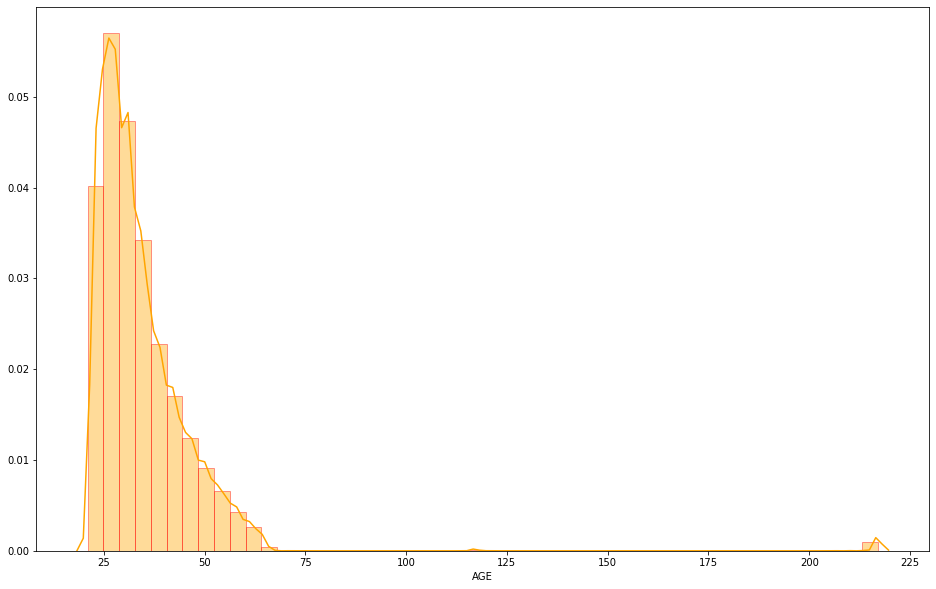

In [133]:
plotDist(dataTest.AGE)

In [134]:
dataTest.AGE[dataTest.AGE > 100] = dataTest.AGE.median()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


####AMB

In [135]:
dataTest[AMB].isnull().sum()

AMB_MON_01       0
AMB_MON_02     659
AMB_MON_03    1818
AMB_MON_04    3792
dtype: int64

In [136]:
ambFill(dataTest,AMB)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


#### ZIPCODE

In [137]:
dataTest.ZIP_CODE_FINAL.isnull().sum()

1360

In [138]:
cleaningZipCode(dataTest)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


ZIP_CODE Columns has 1360 Null Values.
index droped <generator object cleaningZipCode.<locals>.<genexpr> at 0x7f11c56adaf0>


In [0]:
def unseenZip(x):
    if x not in leZIP_CODE_FINAL.classes_:
        return 'EMPTY'
    else:
        return x

In [0]:
dataTest.ZIP_CODE_FINAL = dataTest.ZIP_CODE_FINAL.apply(lambda x: unseenZip(x))

In [0]:
labelEncodeColTest(dataTest,'ZIP_CODE_FINAL',leZIP_CODE_FINAL)

#### EOP_MON

In [142]:
dataTest[EOP].isnull().sum()

EOP_MON_02     657
EOP_MON_03    1815
dtype: int64

In [143]:
fillZeroNull(dataTest,EOP)


EOP_MON_02 has 657 null values

EOP_MON_03 has 0 null values
Now:



#### BinCol

In [0]:
for col in binCols:
    if col != 'RESPONDERS':
        labelEncodeColTest(dataTest,col,leBin)

#### CHannleclick Dsp

In [145]:
dataTest.CHANNEL_CLICK_DISP.unique()

array(['NONE', 'DISP', 'CLICK'], dtype=object)

In [0]:
labelEncodeColTest(dataTest,'CHANNEL_CLICK_DISP',leCHANNEL_CLICK_DISP)

#### DESIGNATION

In [147]:
len(dataTest.DESIGNATION_FINAL.unique())

11

In [148]:
len(leDESIGNATION_FINAL.classes_)

11

In [0]:
for x in dataTest.DESIGNATION_FINAL.unique():
    if x not in leDESIGNATION_FINAL.classes_:
        print(x)

In [0]:
labelEncodeColTest(dataTest,'DESIGNATION_FINAL',leDESIGNATION_FINAL)

#### cc dc cat

In [0]:
ccdc = sorted(['NEFT_CC_CATEGORY', 'NEFT_DC_CATEGORY', 'TPT_DC_CATEGORY_MON_01',
       'TPT_CC_CATEGORY_MON_01', 'IMPS_CC_CATEGORY_MON_01'])

In [0]:
ccdcEn = [leIMPS_CC_CATEGORY_MON_01,
leNEFT_CC_CATEGORY,
leNEFT_DC_CATEGORY,
leTPT_CC_CATEGORY_MON_01,
leTPT_DC_CATEGORY_MON_01]

In [0]:
ccdcEnList = list(zip(ccdc,ccdcEn))

In [0]:
def makeCCDC(x,cla):
    if x not in cla:
        return 'NOT_RELEVANT'
    else:
        return x

In [155]:
for i in range(len(ccdcEnList)):
    print('Label Encoding Col {}'.format(ccdcEnList[i][0]))
    dataTest[ccdcEnList[i][0]] = dataTest[ccdcEnList[i][0]].apply(lambda x : makeCCDC(x,ccdcEnList[i][1].classes_))
    labelEncodeColTest(dataTest,ccdcEnList[i][0],ccdcEnList[i][1])

Label Encoding Col IMPS_CC_CATEGORY_MON_01
Label Encoding Col NEFT_CC_CATEGORY
Label Encoding Col NEFT_DC_CATEGORY
Label Encoding Col TPT_CC_CATEGORY_MON_01
Label Encoding Col TPT_DC_CATEGORY_MON_01


#### CORPV TAG

In [0]:
labelEncodeColTest(dataTest,'TOP_CORP_TAG',leTOP_CORP_TAG)

## Prediction

In [157]:
dataTest.head()

,CUSTOMER_ID,ACT_TYPE,GENDER,LEGAL_ENTITY,AGE,N_CASA_MAX_BALANCE_MTD,N_CASA_MIN_BALANCE_MTD,CC_HOLD,CC_ACTIVE,DC_HOLD,DC_ACTIVE,COC_ELIGIBLE,EOP_BAL_MON_01,AMB_MON_04,AMB_MON_01,AMB_MON_02,AMB_MON_03,FINANCE_MON_01,JOBS_MON_01,LIFESTYLE_MON_01,INMON_01KET_MON_01,TRAVEL_MON_01,CHANNEL_CLICK_DISP,DESIGNATION_FINAL,TOP14_CITY,TOP9_CITY,PL2CC_ELIGIBLE,NEFT_CC_CATEGORY,NEFT_DC_CATEGORY,TPT_DC_CATEGORY_MON_01,TPT_CC_CATEGORY_MON_01,IMPS_CC_CATEGORY_MON_01,ZIP_CODE_FINAL,CARD_AUTOMOBILE_MON_01,CARD_HOTEL_MON_01,CARD_JEWELLERY_MON_01,CARD_RESTAURANT_MON_01,CARD_TRAVEL_MON_01,CARD_PRSNL_CARE_MON_01,CARD_HOBBY_MON_01,CARD_HOME_DECOR_MON_01,CARD_MEDICAL_MON_01,CARD_ENTMNT_MON_01,TOP_CORP_TAG,EOP_MON_02,EOP_MON_03,SCRUB_EMI
0,15800,0,1,1,35,1280.74,1197.74,0,0,1,0,0,1280.74,4554.18,1200.42,7340.60,16740.01,0,0,0,0,0,2,4,0,0,0,12,12,13,13,13,18343,0,0,0,0,0,0,0,0,0,0,0,1197.74,17697.74,2557.670455
1,463196,0,1,1,27,8375.36,59.36,0,0,1,1,0,6603.31,2295.72,1433.73,2139.41,2188.83,0,0,0,0,0,2,4,1,0,0,12,12,13,13,13,7453,0,0,0,0,0,0,0,0,1,0,2,1059.36,1377.99,1744.382609
2,309959,1,0,1,37,42.00,42.00,0,0,1,0,0,42.00,42.00,42.00,42.00,42.00,0,0,0,0,0,2,4,0,0,0,12,12,13,13,13,10553,0,0,0,0,0,0,0,0,0,0,0,42.00,42.00,0.000000
3,102348,0,0,1,31,0.00,0.00,0,0,1,0,0,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,2,4,0,0,0,12,12,13,13,13,12497,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.000000
4,114850,0,0,1,28,207084.79,0.00,1,1,1,1,0,2499.64,22348.28,73749.90,214599.11,30244.26,0,0,0,0,1,1,6,1,1,0,11,11,13,12,12,10068,0,0,0,1,0,1,0,0,0,1,1,207084.79,216580.99,2220.316265


In [0]:
XfPred = dataTest.iloc[:,1:].values

In [0]:
def makePred(df,model,indexcol):
    x = df.drop(indexcol,axis=1).values
    prediction = model.predict(x)
    dfnew = df[indexcol].copy()
    result = pd.DataFrame({'RESPONDERS':prediction})
    dfres = pd.concat([dfnew,result],axis=1)
    return dfres

### Logistic Regression

In [176]:
makePred(dataTest,logres,'CUSTOMER_ID')

,CUSTOMER_ID,RESPONDERS
0,15800,0
1,463196,1
2,309959,0
3,102348,0
4,114850,1
...,...,...
199994,483662,0
199995,405143,0
199996,458986,0
199997,237851,0


### Decision Tree

In [177]:
makePred(dataTest,dtc,'CUSTOMER_ID')

,CUSTOMER_ID,RESPONDERS
0,15800,0
1,463196,0
2,309959,0
3,102348,0
4,114850,1
...,...,...
199994,483662,0
199995,405143,0
199996,458986,0
199997,237851,0


### Random Forest

In [178]:
makePred(dataTest,rfc,'CUSTOMER_ID')

,CUSTOMER_ID,RESPONDERS
0,15800,0
1,463196,0
2,309959,0
3,102348,0
4,114850,0
...,...,...
199994,483662,0
199995,405143,0
199996,458986,0
199997,237851,0


### XGBOOST

In [179]:
makePred(dataTest,xgb,'CUSTOMER_ID')

,CUSTOMER_ID,RESPONDERS
0,15800,0
1,463196,0
2,309959,0
3,102348,0
4,114850,0
...,...,...
199994,483662,0
199995,405143,0
199996,458986,0
199997,237851,0


### Naive bayes

In [180]:
makePred(dataTest,nbc,'CUSTOMER_ID')

,CUSTOMER_ID,RESPONDERS
0,15800,1
1,463196,1
2,309959,1
3,102348,1
4,114850,0
...,...,...
199994,483662,1
199995,405143,1
199996,458986,1
199997,237851,1


### Support Vector

In [0]:
# makePred(dataTest,svc,'CUSTOMER_ID')

### Neural Network

In [182]:
makePred(dataTest,ann,'CUSTOMER_ID')

,CUSTOMER_ID,RESPONDERS
0,15800,0
1,463196,1
2,309959,0
3,102348,0
4,114850,1
...,...,...
199994,483662,0
199995,405143,0
199996,458986,0
199997,237851,1
